## Merging Neighborhood Indicators and Neighborhood Boundary Data

# Bringing in data directly 

In [1]:
import pandas as pd
import geopandas as gpd

df = gpd.read_file('scag-Copy1.gpkg')
df

/Users/micaobrien/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


,GEOID,Typology,geometry
0,6.037129e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-118.44870 34.16486, -118.4399..."
1,6.037132e+09,Stable Moderate/Mixed Income,"MULTIPOLYGON (((-118.55355 34.22046, -118.5461..."
2,6.037134e+09,At Risk of Becoming Exclusive,"MULTIPOLYGON (((-118.57103 34.21559, -118.5710..."
3,6.037134e+09,Advanced Gentrification,"MULTIPOLYGON (((-118.60590 34.21966, -118.6058..."
4,6.037242e+09,Low-Income/Susceptible to Displacement,"MULTIPOLYGON (((-118.25364 33.94328, -118.2491..."
...,...,...,...
4548,6.037920e+09,At Risk of Becoming Exclusive,"MULTIPOLYGON (((-118.47445 34.43330, -118.4683..."
4549,6.037542e+09,Low-Income/Susceptible to Displacement,"MULTIPOLYGON (((-118.19843 33.91057, -118.1987..."
4550,6.111004e+09,Ongoing Displacement,"MULTIPOLYGON (((-119.20831 34.18122, -119.2045..."
4551,6.065045e+09,Low-Income/Susceptible to Displacement,"MULTIPOLYGON (((-116.49298 33.81588, -116.4928..."


In [2]:
df.shape

(4553, 3)

In [3]:
neighborhoods = gpd.read_file('LA_Times_Neighborhood_Boundaries (1)-Copy1.geojson')

In [4]:
join = gpd.sjoin(neighborhoods, df)
join

,OBJECTID,name,geometry,index_right,GEOID,Typology
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",692,6.037222e+09,High Student Population
31,32,Exposition Park,"POLYGON ((-118.29155 34.01837, -118.28294 34.0...",692,6.037222e+09,High Student Population
93,94,University Park,"POLYGON ((-118.27986 34.01848, -118.28294 34.0...",692,6.037222e+09,High Student Population
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",4033,6.037222e+09,Early/Ongoing Gentrification
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",81,6.037222e+09,Advanced Gentrification
...,...,...,...,...,...,...
112,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",4256,6.037138e+09,Stable/Advanced Exclusive
112,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",1331,6.037137e+09,Stable Moderate/Mixed Income
112,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",669,6.037137e+09,Stable/Advanced Exclusive
112,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",33,6.037137e+09,At Risk of Becoming Exclusive


In [5]:
join.shape

(1992, 6)

In [6]:
Westlake = join.loc[join['name'] == 'Westlake']
Westlake.shape

(40, 6)

In [7]:
Westlake = Westlake.drop(['index_right'], axis=1)
Westlake

,OBJECTID,name,geometry,GEOID,Typology
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Advanced Gentrification
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Low-Income/Susceptible to Displacement
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Ongoing Displacement
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037196e+09,Early/Ongoing Gentrification


In [8]:
Downtown = join.loc[join['name'] == 'Downtown']
Downtown.shape

(24, 6)

In [9]:
Downtown = Downtown.drop(['index_right'], axis=1)
Downtown

,OBJECTID,name,geometry,GEOID,Typology
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037206e+09,Advanced Gentrification
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037206e+09,Stable Moderate/Mixed Income
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037226e+09,Ongoing Displacement
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037207e+09,At Risk of Gentrification
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037207e+09,Early/Ongoing Gentrification
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037198e+09,Advanced Gentrification
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037198e+09,Early/Ongoing Gentrification
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037224e+09,Advanced Gentrification
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037226e+09,Early/Ongoing Gentrification
23,24,Downtown,"POLYGON ((-118.24450 34.06131, -118.24376 34.0...",6.037224e+09,Advanced Gentrification


In [10]:
Echo_Park = join.loc[join['name'] == 'Echo Park']
Echo_Park.shape

(17, 6)

In [11]:
Echo_Park = Echo_Park.drop(['index_right'], axis=1)
Echo_Park

,OBJECTID,name,geometry,GEOID,Typology
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037198e+09,Advanced Gentrification
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037198e+09,Early/Ongoing Gentrification
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037980e+09,Unavailable or Unreliable Data
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037208e+09,Low-Income/Susceptible to Displacement
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Advanced Gentrification
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037197e+09,Advanced Gentrification
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037197e+09,Advanced Gentrification
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Advanced Gentrification
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037197e+09,Advanced Gentrification
26,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037187e+09,Stable Moderate/Mixed Income


In [12]:
Silver_Lake = join.loc[join['name'] == 'Silver Lake']
Silver_Lake.shape

(26, 6)

In [13]:
Silver_Lake = Silver_Lake.drop(['index_right'], axis=1)
Silver_Lake

,OBJECTID,name,geometry,GEOID,Typology
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037187e+09,Early/Ongoing Gentrification
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037187e+09,Advanced Gentrification
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037980e+09,High Student Population
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037193e+09,Early/Ongoing Gentrification
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037191e+09,Advanced Gentrification
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037191e+09,Low-Income/Susceptible to Displacement
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037191e+09,Early/Ongoing Gentrification
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037191e+09,Early/Ongoing Gentrification
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037195e+09,Advanced Gentrification
84,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037196e+09,Advanced Gentrification


In [14]:
Koreatown = join.loc[join['name'] == 'Koreatown']
Koreatown.shape

(46, 6)

In [15]:
Koreatown = Koreatown.drop(['index_right'], axis=1)
Koreatown

,OBJECTID,name,geometry,GEOID,Typology
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037213e+09,Low-Income/Susceptible to Displacement
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037213e+09,Low-Income/Susceptible to Displacement
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037213e+09,Advanced Gentrification
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Low-Income/Susceptible to Displacement
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Early/Ongoing Gentrification
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Ongoing Displacement
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Early/Ongoing Gentrification
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037192e+09,Advanced Gentrification
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037193e+09,Low-Income/Susceptible to Displacement
52,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037193e+09,Ongoing Displacement


In [16]:
Pico_Union = join.loc[join['name'] == 'Pico-Union']
Pico_Union.shape

(23, 6)

In [17]:
Pico_Union = Pico_Union.drop(['index_right'], axis=1)
Pico_Union

,OBJECTID,name,geometry,GEOID,Typology
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,Early/Ongoing Gentrification
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037222e+09,Low-Income/Susceptible to Displacement
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037224e+09,Ongoing Displacement
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,Early/Ongoing Gentrification
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,Early/Ongoing Gentrification
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037213e+09,Low-Income/Susceptible to Displacement
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037213e+09,Low-Income/Susceptible to Displacement
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037224e+09,Advanced Gentrification
73,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037213e+09,Early/Ongoing Gentrification


In [18]:
join1 = Westlake.append(Downtown, ignore_index=True)

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/368864608.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join1 = Westlake.append(Downtown, ignore_index=True)


In [19]:
join2 = join1.append(Echo_Park, ignore_index=True)
join2

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/3028189760.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join2 = join1.append(Echo_Park, ignore_index=True)


,OBJECTID,name,geometry,GEOID,Typology
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Advanced Gentrification
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Low-Income/Susceptible to Displacement
...,...,...,...,...,...
76,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037198e+09,Advanced Gentrification
77,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Early/Ongoing Gentrification
78,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Early/Ongoing Gentrification
79,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Advanced Gentrification


In [20]:
join3 = join2.append(Silver_Lake, ignore_index=True)
join3

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/2060507470.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join3 = join2.append(Silver_Lake, ignore_index=True)


,OBJECTID,name,geometry,GEOID,Typology
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Advanced Gentrification
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Low-Income/Susceptible to Displacement
...,...,...,...,...,...
102,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037196e+09,Early/Ongoing Gentrification
103,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037196e+09,Advanced Gentrification
104,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037196e+09,Advanced Gentrification
105,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1...",6.037196e+09,Advanced Gentrification


In [21]:
join4 = join3.append(Koreatown, ignore_index=True)
join4

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/2834754240.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  join4 = join3.append(Koreatown, ignore_index=True)


,OBJECTID,name,geometry,GEOID,Typology
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Advanced Gentrification
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Low-Income/Susceptible to Displacement
...,...,...,...,...,...
148,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037212e+09,Early/Ongoing Gentrification
149,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Advanced Gentrification
150,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Early/Ongoing Gentrification
151,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037212e+09,Becoming Exclusive


In [22]:
final_join = join4.append(Pico_Union, ignore_index=True)
final_join

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/1279122901.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_join = join4.append(Pico_Union, ignore_index=True)


,OBJECTID,name,geometry,GEOID,Typology
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Advanced Gentrification
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Low-Income/Susceptible to Displacement
...,...,...,...,...,...
171,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification
172,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification
173,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification
174,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification


## Census Data - Household Size

In [23]:
hh_size_2020 = gpd.read_file('acs2020_5yr_B11016_14000US06037212701.geojson')
hh_size_2020.head()

,geoid,name,B11016001,"B11016001, Error",B11016002,"B11016002, Error",B11016003,"B11016003, Error",B11016004,"B11016004, Error",...,"B11016012, Error",B11016013,"B11016013, Error",B11016014,"B11016014, Error",B11016015,"B11016015, Error",B11016016,"B11016016, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1505.0,112.0,1085.0,139.0,404.0,104.0,382.0,124.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1341.0,151.0,988.0,135.0,400.0,118.0,162.0,84.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1430.0,208.0,960.0,159.0,397.0,151.0,191.0,79.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
3,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",1513.0,325.0,934.0,277.0,334.0,267.0,294.0,137.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",969.0,174.0,681.0,97.0,183.0,94.0,260.0,102.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931..."


In [24]:
hh_size_2020 = hh_size_2020.rename(columns={"B11016001": "Total", "B11016002": "Family_hh_total", 
                                            "B11016003": "2_pp_hh", "B11016004":"3_pp_hh", "B11016005": "4_pp_hh","B11016006":"5_pp_hh", "B11016007":"6_pp_hh", "B11016008":"7plus_pp_hh","B11016009":"Nonfamily_hh_total", "B11016010":"1_pp_hhnf", "B11016011":
                                           "2_pp_hhnf", "B11016012":"3_pp_hhnf", "B11016013":"4_pp_hhnf", "B11016014":
                                           "5_pp_hhnf", "B11016015":"6_pp_hhnf", "B11016016":"7plus_pp_hhnf"})

In [25]:
hh_size_2020 = hh_size_2020.drop(columns=['B11016001, Error', 'B11016002, Error', 'B11016003, Error', 'B11016004, Error', 'B11016005, Error', 'B11016006, Error', 'B11016007, Error', 'B11016008, Error', 'B11016009, Error', 'B11016010, Error', 'B11016011, Error', 'B11016012, Error', 'B11016013, Error', 'B11016014, Error', 'B11016015, Error', 'B11016016, Error'])

In [26]:
hh_size_2020['Family_hh_total_percent'] = hh_size_2020['Family_hh_total']/hh_size_2020['Total']
hh_size_2020['2_pp_hh_percent'] = hh_size_2020['2_pp_hh']/hh_size_2020['Family_hh_total']
hh_size_2020['3_pp_hh_percent'] = hh_size_2020['3_pp_hh']/hh_size_2020['Family_hh_total']
hh_size_2020['4_pp_hh_percent'] = hh_size_2020['4_pp_hh']/hh_size_2020['Family_hh_total']
hh_size_2020['5_pp_hh_percent'] = hh_size_2020['5_pp_hh']/hh_size_2020['Family_hh_total']
hh_size_2020['6_pp_hh_percent'] = hh_size_2020['6_pp_hh']/hh_size_2020['Family_hh_total']
hh_size_2020['7plus_pp_hh_percent'] = hh_size_2020['7plus_pp_hh']/hh_size_2020['Family_hh_total']
hh_size_2020['Nonfamily_hh_total_percent'] = hh_size_2020['Nonfamily_hh_total']/hh_size_2020['Total']
hh_size_2020['1_pp_hhnf_percent'] = hh_size_2020['1_pp_hhnf']/hh_size_2020['Nonfamily_hh_total']
hh_size_2020['2_pp_hhnf_percent'] = hh_size_2020['2_pp_hhnf']/hh_size_2020['Nonfamily_hh_total']
hh_size_2020['3_pp_hhnf_percent'] = hh_size_2020['3_pp_hhnf']/hh_size_2020['Nonfamily_hh_total']
hh_size_2020['4_pp_hhnf_percent'] = hh_size_2020['4_pp_hhnf']/hh_size_2020['Nonfamily_hh_total']
hh_size_2020['5_pp_hhnf_percent'] = hh_size_2020['5_pp_hhnf']/hh_size_2020['Nonfamily_hh_total']
hh_size_2020['6_pp_hhnf_percent'] = hh_size_2020['6_pp_hhnf']/hh_size_2020['Nonfamily_hh_total']
hh_size_2020['7plus_pp_hhnf_percent'] = hh_size_2020['7plus_pp_hhnf']/hh_size_2020['Nonfamily_hh_total']
hh_size_2020.head()

,geoid,name,Total,Family_hh_total,2_pp_hh,3_pp_hh,4_pp_hh,5_pp_hh,6_pp_hh,7plus_pp_hh,...,6_pp_hh_percent,7plus_pp_hh_percent,Nonfamily_hh_total_percent,1_pp_hhnf_percent,2_pp_hhnf_percent,3_pp_hhnf_percent,4_pp_hhnf_percent,5_pp_hhnf_percent,6_pp_hhnf_percent,7plus_pp_hhnf_percent
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1505.0,1085.0,404.0,382.0,201.0,90.0,8.0,0.0,...,0.007373,0.000000,0.279070,0.914286,0.085714,0.0,0.0,0.0,0.0,0.0
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1341.0,988.0,400.0,162.0,278.0,34.0,114.0,0.0,...,0.115385,0.000000,0.263236,0.934844,0.065156,0.0,0.0,0.0,0.0,0.0
2,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1430.0,960.0,397.0,191.0,226.0,110.0,36.0,0.0,...,0.037500,0.000000,0.328671,0.897872,0.102128,0.0,0.0,0.0,0.0,0.0
3,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",1513.0,934.0,334.0,294.0,172.0,63.0,49.0,22.0,...,0.052463,0.023555,0.382683,0.747841,0.252159,0.0,0.0,0.0,0.0,0.0
4,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",969.0,681.0,183.0,260.0,150.0,88.0,0.0,0.0,...,0.000000,0.000000,0.297214,0.805556,0.194444,0.0,0.0,0.0,0.0,0.0


In [27]:
hh_size_2020['avg_size_family'] = ((2*hh_size_2020['2_pp_hh_percent'])+
                                   (3*hh_size_2020['3_pp_hh_percent'])+
                                   (4*hh_size_2020['4_pp_hh_percent'])+
                                   (5*hh_size_2020['5_pp_hh_percent'])+
                                   (6*hh_size_2020['6_pp_hh_percent'])+
                                   (7*hh_size_2020['7plus_pp_hh_percent']))

In [28]:
hh_size_2020['avg_size_nonfamily'] = ((1*hh_size_2020['1_pp_hhnf_percent'])+(2*hh_size_2020['2_pp_hhnf_percent'])+(3*hh_size_2020['3_pp_hhnf_percent'])+(4*hh_size_2020['4_pp_hhnf_percent'])+(5*hh_size_2020['5_pp_hhnf_percent'])+(6*hh_size_2020['6_pp_hhnf_percent'])+(7*hh_size_2020['7plus_pp_hhnf_percent']))

In [29]:
hh_size_2020.head()

,geoid,name,Total,Family_hh_total,2_pp_hh,3_pp_hh,4_pp_hh,5_pp_hh,6_pp_hh,7plus_pp_hh,...,Nonfamily_hh_total_percent,1_pp_hhnf_percent,2_pp_hhnf_percent,3_pp_hhnf_percent,4_pp_hhnf_percent,5_pp_hhnf_percent,6_pp_hhnf_percent,7plus_pp_hhnf_percent,avg_size_family,avg_size_nonfamily
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1505.0,1085.0,404.0,382.0,201.0,90.0,8.0,0.0,...,0.279070,0.914286,0.085714,0.0,0.0,0.0,0.0,0.0,3.000922,1.085714
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1341.0,988.0,400.0,162.0,278.0,34.0,114.0,0.0,...,0.263236,0.934844,0.065156,0.0,0.0,0.0,0.0,0.0,3.291498,1.065156
2,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1430.0,960.0,397.0,191.0,226.0,110.0,36.0,0.0,...,0.328671,0.897872,0.102128,0.0,0.0,0.0,0.0,0.0,3.163542,1.102128
3,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",1513.0,934.0,334.0,294.0,172.0,63.0,49.0,22.0,...,0.382683,0.747841,0.252159,0.0,0.0,0.0,0.0,0.0,3.213062,1.252159
4,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",969.0,681.0,183.0,260.0,150.0,88.0,0.0,0.0,...,0.297214,0.805556,0.194444,0.0,0.0,0.0,0.0,0.0,3.209985,1.194444


In [30]:
hh_size_2010 = pd.read_csv('ACSDT5YSPT2010.B11016_data_with_overlays_2022-05-08T201304.csv')
hh_size_2010.drop(index=hh_size_2010.index[0], 
        axis=0, 
        inplace=True)
hh_size_2010

,B11016_001E,B11016_001M,B11016_002E,B11016_002M,B11016_003E,B11016_003M,B11016_004E,B11016_004M,B11016_005E,B11016_005M,...,B11016_014E,B11016_014M,B11016_015E,B11016_015M,B11016_016E,B11016_016M,GEO_ID,NAME,POPGROUP,POPGROUP_TTL
1,1693,65,1190,125,353,100,325,125,363,118,...,17,28,0,132,0,132,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",001,Total population
2,1304,69,1011,94,370,95,335,94,222,72,...,0,132,0,132,0,132,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",001,Total population
3,2175,114,1696,151,539,169,535,156,284,117,...,0,132,0,132,0,132,1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",001,Total population
4,1173,85,777,111,334,84,90,49,241,102,...,0,132,0,132,0,132,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",001,Total population
5,1408,90,1065,97,426,118,358,113,201,76,...,0,132,0,132,0,132,1400000US06037101300,"Census Tract 1013, Los Angeles County, California",001,Total population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1779,182,1497,174,296,147,350,130,711,163,...,0,132,0,132,0,132,1400000US06037920339,"Census Tract 9203.39, Los Angeles County, Cali...",001,Total population
2299,201,75,122,67,17,20,47,49,29,49,...,0,132,0,132,0,132,1400000US06037930200,"Census Tract 9302, Los Angeles County, California",001,Total population
2300,296,57,214,69,106,51,64,53,31,26,...,0,132,0,132,0,132,1400000US06037930301,"Census Tract 9303.01, Los Angeles County, Cali...",001,Total population
2301,890,56,650,76,222,81,158,71,157,55,...,0,132,0,132,0,132,1400000US06037930401,"Census Tract 9304.01, Los Angeles County, Cali...",001,Total population


In [31]:
hh_size_2010 = hh_size_2010.rename(columns={"GEO_ID":"geoid", "B11016_001E": "Total_2010", "B11016_002E": "Family_hh_total_2010", 
                                            "B11016_003E": "two_pp_hh_2010", "B11016_004E":"three_pp_hh_2010", "B11016_005E": "four_pp_hh_2010","B11016_006E":"five_pp_hh_2010", "B11016_007E":"six_pp_hh_2010", "B11016_008E":"sevenplus_pp_hh_2010","B11016_009E":"Nonfamily_hh_total_2010", "B11016_010E":"one_pp_hhnf_2010", "B11016_011E":
                                           "two_pp_hhnf_2010", "B11016_012E":"three_pp_hhnf_2010", "B11016_013E":"four_pp_hhnf_2010", "B11016_014E":
                                           "five_pp_hhnf_2010", "B11016_015E":"six_pp_hhnf_2010", "B11016_016E":"sevenplus_pp_hhnf_2010"})

In [32]:
hh_size_2010

,Total_2010,B11016_001M,Family_hh_total_2010,B11016_002M,two_pp_hh_2010,B11016_003M,three_pp_hh_2010,B11016_004M,four_pp_hh_2010,B11016_005M,...,five_pp_hhnf_2010,B11016_014M,six_pp_hhnf_2010,B11016_015M,sevenplus_pp_hhnf_2010,B11016_016M,geoid,NAME,POPGROUP,POPGROUP_TTL
1,1693,65,1190,125,353,100,325,125,363,118,...,17,28,0,132,0,132,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",001,Total population
2,1304,69,1011,94,370,95,335,94,222,72,...,0,132,0,132,0,132,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",001,Total population
3,2175,114,1696,151,539,169,535,156,284,117,...,0,132,0,132,0,132,1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",001,Total population
4,1173,85,777,111,334,84,90,49,241,102,...,0,132,0,132,0,132,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",001,Total population
5,1408,90,1065,97,426,118,358,113,201,76,...,0,132,0,132,0,132,1400000US06037101300,"Census Tract 1013, Los Angeles County, California",001,Total population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1779,182,1497,174,296,147,350,130,711,163,...,0,132,0,132,0,132,1400000US06037920339,"Census Tract 9203.39, Los Angeles County, Cali...",001,Total population
2299,201,75,122,67,17,20,47,49,29,49,...,0,132,0,132,0,132,1400000US06037930200,"Census Tract 9302, Los Angeles County, California",001,Total population
2300,296,57,214,69,106,51,64,53,31,26,...,0,132,0,132,0,132,1400000US06037930301,"Census Tract 9303.01, Los Angeles County, Cali...",001,Total population
2301,890,56,650,76,222,81,158,71,157,55,...,0,132,0,132,0,132,1400000US06037930401,"Census Tract 9304.01, Los Angeles County, Cali...",001,Total population


In [33]:
hh_size_2010 = hh_size_2010.drop(columns=['POPGROUP', 'B11016_001M', 'B11016_002M', 'B11016_003M', 'B11016_004M', 'B11016_005M', 'B11016_006M', 'B11016_007M', 'B11016_008M', 'B11016_009M', 'B11016_010M', 'B11016_011M', 'B11016_012M', 'B11016_013M', 'B11016_014M', 'B11016_015M', 'B11016_016M'])

In [34]:
hh_size_2010['Family_hh_total_2010'] = hh_size_2010.Family_hh_total_2010.astype(float)

In [35]:
hh_size_2010['Total_2010'] = hh_size_2010.Total_2010.astype(float)
hh_size_2010['Family_hh_total_2010'] = hh_size_2010.Family_hh_total_2010.astype(float)
hh_size_2010['two_pp_hh_2010'] = hh_size_2010.two_pp_hh_2010.astype(float)
hh_size_2010['three_pp_hh_2010'] = hh_size_2010.three_pp_hh_2010.astype(float)
hh_size_2010['four_pp_hh_2010'] = hh_size_2010.four_pp_hh_2010.astype(float)
hh_size_2010['five_pp_hh_2010'] = hh_size_2010.five_pp_hh_2010.astype(float)
hh_size_2010['six_pp_hh_2010'] = hh_size_2010.six_pp_hh_2010.astype(float)
hh_size_2010['sevenplus_pp_hh_2010'] = hh_size_2010.sevenplus_pp_hh_2010.astype(float)
hh_size_2010['Nonfamily_hh_total_2010'] = hh_size_2010.Nonfamily_hh_total_2010.astype(float)
hh_size_2010['one_pp_hhnf_2010'] = hh_size_2010.one_pp_hhnf_2010.astype(float)
hh_size_2010['two_pp_hhnf_2010'] = hh_size_2010.two_pp_hhnf_2010.astype(float)
hh_size_2010['three_pp_hhnf_2010'] = hh_size_2010.three_pp_hhnf_2010.astype(float)
hh_size_2010['four_pp_hhnf_2010'] = hh_size_2010.four_pp_hhnf_2010.astype(float)
hh_size_2010['five_pp_hhnf_2010'] = hh_size_2010.five_pp_hhnf_2010.astype(float)
hh_size_2010['six_pp_hhnf_2010'] = hh_size_2010.six_pp_hhnf_2010.astype(float)
hh_size_2010['sevenplus_pp_hhnf_2010'] = hh_size_2010.sevenplus_pp_hhnf_2010.astype(float)

In [36]:
hh_size_2010['Family_hh_total_2010_percent'] = hh_size_2010['Family_hh_total_2010']/hh_size_2010['Total_2010']
hh_size_2010['two_pp_hh_2010_percent'] = hh_size_2010['two_pp_hh_2010']/hh_size_2010['Family_hh_total_2010']
hh_size_2010['three_pp_hh_2010_percent'] = hh_size_2010['three_pp_hh_2010']/hh_size_2010['Family_hh_total_2010']
hh_size_2010['four_pp_hh_2010_percent'] = hh_size_2010['four_pp_hh_2010']/hh_size_2010['Family_hh_total_2010']
hh_size_2010['five_pp_hh_2010_percent'] = hh_size_2010['five_pp_hh_2010']/hh_size_2010['Family_hh_total_2010']
hh_size_2010['six_pp_hh_2010_percent'] = hh_size_2010['six_pp_hh_2010']/hh_size_2010['Family_hh_total_2010']
hh_size_2010['sevenplus_pp_hh_2010_percent'] = hh_size_2010['sevenplus_pp_hh_2010']/hh_size_2010['Family_hh_total_2010']
hh_size_2010['Nonfamily_hh_total_2010_percent'] = hh_size_2010['Nonfamily_hh_total_2010']/hh_size_2020['Total']
hh_size_2010['one_pp_hhnf_2010_percent'] = hh_size_2010['one_pp_hhnf_2010']/hh_size_2010['Nonfamily_hh_total_2010']
hh_size_2010['two_pp_hhnf_2010_percent'] = hh_size_2010['two_pp_hhnf_2010']/hh_size_2010['Nonfamily_hh_total_2010']
hh_size_2010['three_pp_hhnf_2010_percent'] = hh_size_2010['three_pp_hhnf_2010']/hh_size_2010['Nonfamily_hh_total_2010']
hh_size_2010['four_pp_hhnf_2010_percent'] = hh_size_2010['four_pp_hhnf_2010']/hh_size_2010['Nonfamily_hh_total_2010']
hh_size_2010['five_pp_hhnf_2010_percent'] = hh_size_2010['five_pp_hhnf_2010']/hh_size_2010['Nonfamily_hh_total_2010']
hh_size_2010['six_pp_hhnf_2010_percent'] = hh_size_2010['six_pp_hhnf_2010']/hh_size_2010['Nonfamily_hh_total_2010']
hh_size_2010['sevenplus_pp_hhnf_2010_percent'] = hh_size_2010['sevenplus_pp_hhnf_2010']/hh_size_2010['Nonfamily_hh_total_2010']
hh_size_2010.head()

,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,five_pp_hh_2010,six_pp_hh_2010,sevenplus_pp_hh_2010,Nonfamily_hh_total_2010,one_pp_hhnf_2010,...,six_pp_hh_2010_percent,sevenplus_pp_hh_2010_percent,Nonfamily_hh_total_2010_percent,one_pp_hhnf_2010_percent,two_pp_hhnf_2010_percent,three_pp_hhnf_2010_percent,four_pp_hhnf_2010_percent,five_pp_hhnf_2010_percent,six_pp_hhnf_2010_percent,sevenplus_pp_hhnf_2010_percent
1,1693.0,1190.0,353.0,325.0,363.0,70.0,40.0,39.0,503.0,307.0,...,0.033613,0.032773,0.375093,0.610338,0.341948,0.013917,0.0,0.033797,0.0,0.0
2,1304.0,1011.0,370.0,335.0,222.0,50.0,21.0,13.0,293.0,217.0,...,0.020772,0.012859,0.204895,0.740614,0.259386,0.000000,0.0,0.000000,0.0,0.0
3,2175.0,1696.0,539.0,535.0,284.0,296.0,14.0,28.0,479.0,327.0,...,0.008255,0.016509,0.316590,0.682672,0.263048,0.054280,0.0,0.000000,0.0,0.0
4,1173.0,777.0,334.0,90.0,241.0,34.0,57.0,21.0,396.0,319.0,...,0.073359,0.027027,0.408669,0.805556,0.194444,0.000000,0.0,0.000000,0.0,0.0
5,1408.0,1065.0,426.0,358.0,201.0,43.0,20.0,17.0,343.0,255.0,...,0.018779,0.015962,0.241720,0.743440,0.166181,0.090379,0.0,0.000000,0.0,0.0


In [37]:
hh_size_2010['avg_size_family_2010'] = ((2*hh_size_2010['two_pp_hh_2010_percent'])+(3*hh_size_2010['three_pp_hh_2010_percent'])+
                                        (4*hh_size_2010['four_pp_hh_2010_percent'])+(5*hh_size_2010['five_pp_hh_2010_percent'])+(6*hh_size_2010['six_pp_hh_2010_percent'])+(7*hh_size_2010['sevenplus_pp_hh_2010_percent']))

In [38]:
hh_size_2010['avg_size_nonfamily_2010'] = ((2*hh_size_2010['two_pp_hhnf_2010_percent'])+(3*hh_size_2010['three_pp_hhnf_2010_percent'])+(4*hh_size_2010['four_pp_hhnf_2010_percent'])+(5*hh_size_2010['five_pp_hhnf_2010_percent'])+(6*hh_size_2010['six_pp_hhnf_2010_percent'])+(7*hh_size_2010['sevenplus_pp_hhnf_2010_percent']))

In [39]:
hh_size_2020['GEOID'] = hh_size_2020.geoid.str.split('US0', 1, expand = True).get(1)
hh_size_2020['GEOID'] = hh_size_2020.GEOID.str.replace('NA','0').astype(float)

In [40]:
hh_size_2010['GEOID'] = hh_size_2010.geoid.str.split('US0', 1, expand = True).get(1)
hh_size_2010['GEOID'] = hh_size_2010.GEOID.str.replace('NA','0').astype(float)

In [41]:
final_join_hh_size = final_join.merge(
    hh_size_2010, 
    on=["GEOID"], 
    how="left",
    indicator=True,
)
final_join_hh_size

,OBJECTID,name,geometry,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,one_pp_hhnf_2010_percent,two_pp_hhnf_2010_percent,three_pp_hhnf_2010_percent,four_pp_hhnf_2010_percent,five_pp_hhnf_2010_percent,six_pp_hhnf_2010_percent,sevenplus_pp_hhnf_2010_percent,avg_size_family_2010,avg_size_nonfamily_2010,_merge
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Advanced Gentrification,1134.0,241.0,139.0,62.0,12.0,...,0.926092,0.073908,0.000000,0.000000,0.0,0.0,0.0,2.755187,0.147816,both
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,0.810909,0.143636,0.045455,0.000000,0.0,0.0,0.0,4.087097,0.423636,both
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,0.647887,0.195171,0.108652,0.048290,0.0,0.0,0.0,3.757344,0.909457,both
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,955.0,382.0,168.0,54.0,114.0,...,0.858639,0.099476,0.041885,0.000000,0.0,0.0,0.0,3.185864,0.324607,both
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Low-Income/Susceptible to Displacement,1955.0,1311.0,371.0,317.0,254.0,...,0.748447,0.181677,0.017081,0.052795,0.0,0.0,0.0,3.629291,0.625776,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,0.845679,0.138889,0.015432,0.000000,0.0,0.0,0.0,3.566186,0.324074,both
172,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,0.797101,0.130435,0.072464,0.000000,0.0,0.0,0.0,3.978479,0.478261,both
173,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,0.850187,0.149813,0.000000,0.000000,0.0,0.0,0.0,3.213368,0.299625,both
174,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,0.789683,0.210317,0.000000,0.000000,0.0,0.0,0.0,3.767477,0.420635,both


In [42]:
final_join_hh_size.query("_merge != 'both'")
final_join_hh_size = final_join_hh_size.rename(columns={"_merge": "_merge1"})

In [43]:
final_join_hh_size = final_join_hh_size.merge(
    hh_size_2020, 
    on=["GEOID"], 
    how="left",
    indicator=True,
)
final_join_hh_size

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,1_pp_hhnf_percent,2_pp_hhnf_percent,3_pp_hhnf_percent,4_pp_hhnf_percent,5_pp_hhnf_percent,6_pp_hhnf_percent,7plus_pp_hhnf_percent,avg_size_family,avg_size_nonfamily,_merge
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Advanced Gentrification,1134.0,241.0,139.0,62.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,0.852459,0.099851,0.017884,0.029806,0.000000,0.0,0.0,3.793852,1.225037,both
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,0.763204,0.198063,0.038732,0.000000,0.000000,0.0,0.0,3.308738,1.275528,both
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,955.0,382.0,168.0,54.0,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Low-Income/Susceptible to Displacement,1955.0,1311.0,371.0,317.0,254.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,0.645283,0.271698,0.083019,0.000000,0.000000,0.0,0.0,3.589330,1.437736,both
172,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,0.629771,0.290076,0.011450,0.015267,0.053435,0.0,0.0,4.115830,1.572519,both
173,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,0.536481,0.304721,0.158798,0.000000,0.000000,0.0,0.0,3.105159,1.622318,both
174,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,0.710674,0.227528,0.061798,0.000000,0.000000,0.0,0.0,3.600000,1.351124,both


In [44]:
final_join_hh_size.query("_merge != 'both'")
final_join_hh_size = final_join_hh_size.rename(columns={"_merge": "_merge2"})

In [45]:
final_join_hh_size.columns

Index(['OBJECTID', 'name_x', 'geometry_x', 'GEOID', 'Typology', 'Total_2010',
       'Family_hh_total_2010', 'two_pp_hh_2010', 'three_pp_hh_2010',
       'four_pp_hh_2010', 'five_pp_hh_2010', 'six_pp_hh_2010',
       'sevenplus_pp_hh_2010', 'Nonfamily_hh_total_2010', 'one_pp_hhnf_2010',
       'two_pp_hhnf_2010', 'three_pp_hhnf_2010', 'four_pp_hhnf_2010',
       'five_pp_hhnf_2010', 'six_pp_hhnf_2010', 'sevenplus_pp_hhnf_2010',
       'geoid_x', 'NAME', 'POPGROUP_TTL', 'Family_hh_total_2010_percent',
       'two_pp_hh_2010_percent', 'three_pp_hh_2010_percent',
       'four_pp_hh_2010_percent', 'five_pp_hh_2010_percent',
       'six_pp_hh_2010_percent', 'sevenplus_pp_hh_2010_percent',
       'Nonfamily_hh_total_2010_percent', 'one_pp_hhnf_2010_percent',
       'two_pp_hhnf_2010_percent', 'three_pp_hhnf_2010_percent',
       'four_pp_hhnf_2010_percent', 'five_pp_hhnf_2010_percent',
       'six_pp_hhnf_2010_percent', 'sevenplus_pp_hhnf_2010_percent',
       'avg_size_family_2010', 'avg_si

In [46]:
final_join_hh_size = final_join_hh_size.dropna(subset=['avg_size_family', 'avg_size_nonfamily', 'avg_size_family_2010', 'avg_size_nonfamily_2010'])

In [47]:
final_join_hh_size['family_size_percent_change'] = (final_join_hh_size['avg_size_family']-final_join_hh_size['avg_size_family_2010'])/final_join_hh_size['avg_size_family_2010']
final_join_hh_size['nonfamily_size_percent_change'] = (final_join_hh_size['avg_size_nonfamily']-final_join_hh_size['avg_size_nonfamily_2010'])/final_join_hh_size['avg_size_nonfamily_2010']

In [48]:
final_join_hh_size['family_size_percent_change'].mean()

-0.03076324438139976

In [49]:
final_join_hh_size['family_size_percent_change'].median()

-0.02449391690645647

In [50]:
final_join_hh_size['nonfamily_size_percent_change'].mean()

1.8389179655481107

In [51]:
final_join_hh_size['nonfamily_size_percent_change'].median()

1.2849548112706008

## Census Data - Gross Rent - B25064

In [52]:
rent_2020 = pd.read_csv('ACSDT5Y2020.B25064_data_with_overlays_2022-05-17T185744.csv')
rent_2020.drop(index=rent_2020.index[0], 
        axis=0, 
        inplace=True)
rent_2020.columns

Index(['B25064_001E', 'B25064_001M', 'GEO_ID', 'NAME'], dtype='object')

In [53]:
rent_2020 = rent_2020.rename(columns={'B25064_001E':'median_gross_rent'})

In [54]:
rent_2020 = rent_2020.drop(columns=['B25064_001M'])

In [55]:
rent_2020 = rent_2020.replace({'3,500+': '3500'})

In [56]:
rent_2020['median_gross_rent'] = rent_2020.median_gross_rent.str.replace('-','0').astype(float)

In [57]:
rent_2020['GEOID'] = rent_2020.GEO_ID.str.split('US0', 1, expand = True).get(1)
rent_2020['GEOID'] = rent_2020.GEOID.str.replace('NA','0').astype(float)

In [58]:
rent_2010 = pd.read_csv('ACSDT5Y2010.B25064_data_with_overlays_2022-05-17T191055.csv')
rent_2010.drop(index=rent_2010.index[0], 
        axis=0, 
        inplace=True)
rent_2010.columns

Index(['GEO_ID', 'B25064_001E', 'B25064_001M', 'NAME'], dtype='object')

In [59]:
rent_2010 = rent_2010.rename(columns={'B25064_001E':'median_gross_rent_2010'})

In [60]:
rent_2010 = rent_2010.drop(columns=['B25064_001M'])

In [61]:
rent_2010 = rent_2010.replace({'2,000+': '2000'})

In [62]:
rent_2010['median_gross_rent_2010'] = rent_2010.median_gross_rent_2010.str.replace('-','0').astype(float)

In [63]:
rent_2010['GEOID'] = rent_2010.GEO_ID.str.split('US0', 1, expand = True).get(1)
rent_2010['GEOID'] = rent_2010.GEOID.str.replace('NA','0').astype(float)

In [64]:
census_neighborhoods_UDP = final_join_hh_size.merge(
    rent_2020, 
    on=["GEOID"], 
    how="left",
    indicator=True,
)
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,7plus_pp_hhnf_percent,avg_size_family,avg_size_nonfamily,_merge2,family_size_percent_change,nonfamily_size_percent_change,median_gross_rent,GEO_ID,NAME_y,_merge
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,0.0,3.793852,1.225037,both,-0.071749,1.891719,906.0,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",both
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,0.0,3.308738,1.275528,both,-0.119394,0.402517,1051.0,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",both
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,0.0,3.375926,1.430233,both,-0.024494,1.193023,1587.0,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",both
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,0.0,3.577941,1.356295,both,0.059836,0.677729,1431.0,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",both
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,0.0,3.679787,1.379679,both,0.085038,1.574677,971.0,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,0.0,3.589330,1.437736,both,0.006490,3.436442,994.0,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",both
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,0.0,4.115830,1.572519,both,0.034523,2.287994,980.0,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",both
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,0.0,3.105159,1.622318,both,-0.033675,4.414485,900.0,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",both
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,0.0,3.600000,1.351124,both,-0.044453,2.212105,1018.0,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",both


In [65]:
census_neighborhoods_UDP.query("_merge1 != 'both'")
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['GEO_ID', 'NAME_x', 'NAME_y', '_merge2'])
census_neighborhoods_UDP.columns

Index(['OBJECTID', 'name_x', 'geometry_x', 'GEOID', 'Typology', 'Total_2010',
       'Family_hh_total_2010', 'two_pp_hh_2010', 'three_pp_hh_2010',
       'four_pp_hh_2010', 'five_pp_hh_2010', 'six_pp_hh_2010',
       'sevenplus_pp_hh_2010', 'Nonfamily_hh_total_2010', 'one_pp_hhnf_2010',
       'two_pp_hhnf_2010', 'three_pp_hhnf_2010', 'four_pp_hhnf_2010',
       'five_pp_hhnf_2010', 'six_pp_hhnf_2010', 'sevenplus_pp_hhnf_2010',
       'geoid_x', 'POPGROUP_TTL', 'Family_hh_total_2010_percent',
       'two_pp_hh_2010_percent', 'three_pp_hh_2010_percent',
       'four_pp_hh_2010_percent', 'five_pp_hh_2010_percent',
       'six_pp_hh_2010_percent', 'sevenplus_pp_hh_2010_percent',
       'Nonfamily_hh_total_2010_percent', 'one_pp_hhnf_2010_percent',
       'two_pp_hhnf_2010_percent', 'three_pp_hhnf_2010_percent',
       'four_pp_hhnf_2010_percent', 'five_pp_hhnf_2010_percent',
       'six_pp_hhnf_2010_percent', 'sevenplus_pp_hhnf_2010_percent',
       'avg_size_family_2010', 'avg_size_nonfa

In [66]:
census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
    rent_2010, 
    on=["GEOID"], 
    how="left",
    #indicator=True,
)
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,7plus_pp_hhnf_percent,avg_size_family,avg_size_nonfamily,family_size_percent_change,nonfamily_size_percent_change,median_gross_rent,_merge,GEO_ID,median_gross_rent_2010,NAME
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,0.0,3.793852,1.225037,-0.071749,1.891719,906.0,both,1400000US06037210010,596.0,"Census Tract 2100.10, Los Angeles County, Cali..."
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,0.0,3.308738,1.275528,-0.119394,0.402517,1051.0,both,1400000US06037209300,827.0,"Census Tract 2093, Los Angeles County, California"
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,0.0,3.375926,1.430233,-0.024494,1.193023,1587.0,both,1400000US06037211122,1099.0,"Census Tract 2111.22, Los Angeles County, Cali..."
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,0.0,3.577941,1.356295,0.059836,0.677729,1431.0,both,1400000US06037192700,906.0,"Census Tract 1927, Los Angeles County, California"
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,0.0,3.679787,1.379679,0.085038,1.574677,971.0,both,1400000US06037208302,713.0,"Census Tract 2083.02, Los Angeles County, Cali..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,0.0,3.589330,1.437736,0.006490,3.436442,994.0,both,1400000US06037221110,658.0,"Census Tract 2211.10, Los Angeles County, Cali..."
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,0.0,4.115830,1.572519,0.034523,2.287994,980.0,both,1400000US06037209820,782.0,"Census Tract 2098.20, Los Angeles County, Cali..."
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,0.0,3.105159,1.622318,-0.033675,4.414485,900.0,both,1400000US06037209810,617.0,"Census Tract 2098.10, Los Angeles County, Cali..."
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,0.0,3.600000,1.351124,-0.044453,2.212105,1018.0,both,1400000US06037209520,780.0,"Census Tract 2095.20, Los Angeles County, Cali..."


In [67]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['GEO_ID', 'NAME','_merge'])

In [68]:
census_neighborhoods_UDP['rent_percent_change'] = (census_neighborhoods_UDP['median_gross_rent']-census_neighborhoods_UDP['median_gross_rent_2010'])/census_neighborhoods_UDP['median_gross_rent_2010']

In [69]:
census_neighborhoods_UDP.rent_percent_change

0      0.520134
1      0.270859
2      0.444040
3      0.579470
4      0.361851
         ...   
152    0.510638
153    0.253197
154    0.458671
155    0.305128
156    0.461832
Name: rent_percent_change, Length: 157, dtype: float64

In [70]:
census_neighborhoods_UDP['rent_percent_change'].mean()

0.46146114984829373

In [71]:
census_neighborhoods_UDP['rent_percent_change'].median()

0.4258849557522124

### Adjusting for inflation

In [72]:
rent_2010['median_gross_rent_2010_inflation'] = (rent_2010['median_gross_rent_2010']/248.721)*337.570

In [73]:
rent_2010 = rent_2010.drop(columns={'GEO_ID', 'median_gross_rent_2010', 'NAME'})

In [74]:
census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
    rent_2010, 
    on=["GEOID"], 
    how="left",
    indicator=True,
)
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,7plus_pp_hhnf_percent,avg_size_family,avg_size_nonfamily,family_size_percent_change,nonfamily_size_percent_change,median_gross_rent,median_gross_rent_2010,rent_percent_change,median_gross_rent_2010_inflation,_merge
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,0.0,3.793852,1.225037,-0.071749,1.891719,906.0,596.0,0.520134,808.905239,both
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,0.0,3.308738,1.275528,-0.119394,0.402517,1051.0,827.0,0.270859,1122.423881,both
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,0.0,3.375926,1.430233,-0.024494,1.193023,1587.0,1099.0,0.444040,1491.588688,both
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,0.0,3.577941,1.356295,0.059836,0.677729,1431.0,906.0,0.579470,1229.644541,both
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,0.0,3.679787,1.379679,0.085038,1.574677,971.0,713.0,0.361851,967.700395,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,0.0,3.589330,1.437736,0.006490,3.436442,994.0,658.0,0.510638,893.053100,both
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,0.0,4.115830,1.572519,0.034523,2.287994,980.0,782.0,0.253197,1061.348821,both
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,0.0,3.105159,1.622318,-0.033675,4.414485,900.0,617.0,0.458671,837.406934,both
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,0.0,3.600000,1.351124,-0.044453,2.212105,1018.0,780.0,0.305128,1058.634373,both


In [75]:
census_neighborhoods_UDP['rent_percent_change_inflation'] = (census_neighborhoods_UDP['median_gross_rent']-census_neighborhoods_UDP['median_gross_rent_2010_inflation'])/census_neighborhoods_UDP['median_gross_rent_2010_inflation']

In [76]:
census_neighborhoods_UDP.rent_percent_change_inflation

0      0.120032
1     -0.063634
2      0.063966
3      0.163751
4      0.003410
         ...   
152    0.113036
153   -0.076647
154    0.074746
155   -0.038384
156    0.077075
Name: rent_percent_change_inflation, Length: 157, dtype: float64

In [77]:
census_neighborhoods_UDP['rent_percent_change_inflation'].mean()

0.07680208149840766

In [78]:
census_neighborhoods_UDP['rent_percent_change_inflation'].median()

0.050589602392529125

## Census Data - Gross Rent (Manual Calculation)

In [79]:
#rent_2020 = pd.read_csv('ACSDT5Y2020.B25063_data_with_overlays_2022-04-28T181825.csv')
#rent_2020.drop(index=hh_size_2020.index[0], 
 #       axis=0, 
 #       inplace=True)
#rent_2020.columns

In [80]:
#rent_2020 = rent_2020.rename(columns={"B25063_001E": "Total", "B25063_002E": "Total_cash", 
#                                            "B25063_003E": "less_than_100", "B25063_004E":"onehundred_149", "B25063_005E": "onefifty_199","B25063_006E":"twohundred_249", "B25063_007E":"twofifty_299", "B25063_008E":"threehundred_349","B25063_009E":"threefifty_399", "B25063_010E":"fourhundred_449", "B25063_011E":
 #                                          "fourfifty_499", "B25063_012E":"fivehundred_549", "B25063_013E":"fivefifty_599", "B25063_014E":
  #                                         "sixhundred_649", "B25063_015E":"sixfifty_699", "B25063_016E":"sevenhundred_749", "B25063_017E":"sevenfifty_799",
   #                                        "B25063_018E":"eighthundred_899", "B25063_019E":"ninehundred_999", "B25063_020E":"onethousand_1249", "B25063_021E":"onethousandtwofifty_1499",
    #                                       "B25063_022E":"onethousandfive_1999", "B25063_023E":"twothousand_2499", "B25063_024E":"twothousandfive_2999",
     #                                      "B25063_025E":"threethousand_3499", "B25063_026E":"threethousandfiveplus", 
      #                                     "B25063_027E":"Total_no_cash"})

In [81]:
#rent_2020 = rent_2020.drop(columns=['B25063_001M', 'B25063_002M', 'B25063_003M', 'B25063_004M', 'B25063_005M',
 #                                   'B25063_006M', 'B25063_007M', 'B25063_008M','B25063_009M', 'B25063_010M', 'B25063_011M',
  #                                  'B25063_012M', 'B25063_013M', 'B25063_014M', 'B25063_015M', 'B25063_016M', 'B25063_017M',
   #                                 'B25063_018M', 'B25063_019M', 'B25063_020M', 'B25063_021M', 'B25063_022M', 'B25063_023M',
    #                                'B25063_024M', 'B25063_025M', 'B25063_026M', 'B25063_027M'])

In [82]:
#rent_2020['Total'] = rent_2020.Total.astype(float)
#rent_2020['Total_cash'] = rent_2020.Total_cash.astype(float)
#rent_2020['less_than_100'] = rent_2020.less_than_100.astype(float)
#rent_2020['onehundred_149'] = rent_2020.onehundred_149.astype(float)
#rent_2020['onefifty_199'] = rent_2020.onefifty_199.astype(float)
#rent_2020['twohundred_249'] = rent_2020.twohundred_249.astype(float)
#rent_2020['twofifty_299'] = rent_2020.twofifty_299.astype(float)
#rent_2020['threehundred_349'] = rent_2020.threehundred_349.astype(float)
#rent_2020['threefifty_399'] = rent_2020.threefifty_399.astype(float)
#rent_2020['fourhundred_449'] = rent_2020.fourhundred_449.astype(float)
#rent_2020['fourfifty_499'] = rent_2020.fourfifty_499.astype(float)
#rent_2020['fivehundred_549'] = rent_2020.fivehundred_549.astype(float)
#rent_2020['fivefifty_599'] = rent_2020.fivefifty_599.astype(float)
#rent_2020['sixhundred_649'] = rent_2020.sixhundred_649.astype(float)
#rent_2020['sixfifty_699'] = rent_2020.sixfifty_699.astype(float)
#rent_2020['sevenhundred_749'] = rent_2020.sevenhundred_749.astype(float)
#rent_2020['sevenfifty_799'] = rent_2020.sevenfifty_799.astype(float)
#rent_2020['eighthundred_899'] = rent_2020.eighthundred_899.astype(float)
#rent_2020['ninehundred_999'] = rent_2020.ninehundred_999.astype(float)
#rent_2020['onethousand_1249'] = rent_2020.onethousand_1249.astype(float)
#rent_2020['onethousandtwofifty_1499'] = rent_2020.onethousandtwofifty_1499.astype(float)
#rent_2020['onethousandfive_1999'] = rent_2020.onethousandfive_1999.astype(float)
#rent_2020['twothousand_2499'] = rent_2020.twothousand_2499.astype(float)
#rent_2020['twothousandfive_2999'] = rent_2020.twothousandfive_2999.astype(float)
#rent_2020['threethousand_3499'] = rent_2020.threethousand_3499.astype(float)
#rent_2020['threethousandfiveplus'] = rent_2020.threethousandfiveplus.astype(float)
#rent_2020['Total_no_cash'] = rent_2020.Total_no_cash.astype(float)

In [83]:
#rent_2020

In [84]:
#rent_2020['Total_cash_percent'] = rent_2020['Total_cash']/rent_2020['Total']
#rent_2020['less_than_100_percent'] = rent_2020['less_than_100']/rent_2020['Total_cash']
#rent_2020['onehundred_149_percent'] = rent_2020['onehundred_149']/rent_2020['Total_cash']
#rent_2020['onefifty_199_percent'] = rent_2020['onefifty_199']/rent_2020['Total_cash']
#rent_2020['twohundred_249_percent'] = rent_2020['twohundred_249']/rent_2020['Total_cash']
#rent_2020['twofifty_299_percent'] = rent_2020['twofifty_299']/rent_2020['Total_cash']
#rent_2020['threehundred_349_percent'] = rent_2020['threehundred_349']/rent_2020['Total_cash']
#rent_2020['threefifty_399_percent'] = rent_2020['threefifty_399']/rent_2020['Total_cash']
#rent_2020['fourhundred_449_percent'] = rent_2020['fourhundred_449']/rent_2020['Total_cash']
#rent_2020['fourfifty_499_percent'] = rent_2020['fourfifty_499']/rent_2020['Total_cash']
#rent_2020['fivehundred_549_percent'] = rent_2020['fivehundred_549']/rent_2020['Total_cash']
#rent_2020['fivefifty_599_percent'] = rent_2020['fivefifty_599']/rent_2020['Total_cash']
#rent_2020['sixhundred_649_percent'] = rent_2020['sixhundred_649']/rent_2020['Total_cash']
#rent_2020['sixfifty_699_percent'] = rent_2020['sixfifty_699']/rent_2020['Total_cash']
#rent_2020['sevenhundred_749_percent'] = rent_2020['sevenhundred_749']/rent_2020['Total_cash']
#rent_2020['sevenfifty_799_percent'] = rent_2020['sevenfifty_799']/rent_2020['Total_cash']
#rent_2020['eighthundred_899_percent'] = rent_2020['eighthundred_899']/rent_2020['Total_cash']
#rent_2020['ninehundred_999_percent'] = rent_2020['ninehundred_999']/rent_2020['Total_cash']
#rent_2020['onethousand_1249_percent'] = rent_2020['onethousand_1249']/rent_2020['Total_cash']
#rent_2020['onethousandtwofifty_1499_percent'] = rent_2020['onethousandtwofifty_1499']/rent_2020['Total_cash']
#rent_2020['onethousandfive_1999_percent'] = rent_2020['onethousandfive_1999']/rent_2020['Total_cash']
#rent_2020['twothousand_2499_percent'] = rent_2020['twothousand_2499']/rent_2020['Total_cash']
#rent_2020['twothousandfive_2999_percent'] = rent_2020['twothousandfive_2999']/rent_2020['Total_cash']
#rent_2020['threethousand_3499_percent'] = rent_2020['threethousand_3499']/rent_2020['Total_cash']
#rent_2020['threethousandfiveplus_percent'] = rent_2020['threethousandfiveplus']/rent_2020['Total_cash']
#rent_2020['Total_no_cash_percent'] = rent_2020['Total_no_cash']/rent_2020['Total']

In [85]:
#rent_2020['avg_rent_2020'] = ((50*rent_2020['less_than_100_percent'])+
 #                                       (124.5*rent_2020['onehundred_149_percent'])+
  #                                      (174.5*rent_2020['onefifty_199_percent'])+
   #                                     (224.5*rent_2020['twohundred_249_percent'])+
    #                                    (324.5*rent_2020['threehundred_349_percent'])+
     #                                   (374.5*rent_2020['threefifty_399_percent'])+
      #                                  (424.5*rent_2020['fourhundred_449_percent'])+
       #                                 (474.5*rent_2020['fourfifty_499_percent'])+
        #                                (524.5*rent_2020['fivehundred_549_percent'])+
         #                               (574.5*rent_2020['fivefifty_599_percent'])+
          #                              (624.5*rent_2020['sixhundred_649_percent'])+
           #                             (674.5*rent_2020['sixfifty_699_percent'])+
             #                           (724.5*rent_2020['sevenhundred_749_percent'])+
              #                          (774.5*rent_2020['sevenfifty_799_percent'])+
               #                         (849.5*rent_2020['eighthundred_899_percent'])+
                #                        (949.5*rent_2020['ninehundred_999_percent'])+
                 #                       (1124.5*rent_2020['onethousand_1249_percent'])+
                  #                      (1374.5*rent_2020['onethousandtwofifty_1499_percent'])+
                   #                     (1749.5*rent_2020['onethousandfive_1999_percent'])+
                    #                    (2249.5*rent_2020['twothousand_2499_percent'])+
                     #                   (2749.5*rent_2020['twothousandfive_2999_percent'])+
                      #                  (3249.5*rent_2020['threethousand_3499_percent']))

In [86]:
#rent_2020

In [87]:
#rent_2010 = pd.read_csv('ACSDT5Y2010.B25063_data_with_overlays_2022-05-15T164412.csv')
#rent_2010.drop(index=rent_2010.index[0], 
#        axis=0, 
 #       inplace=True)
#rent_2010.columns

In [88]:
#rent_2010 = rent_2010.rename(columns={"B25063_001E": "Total_2010", "B25063_002E": "Total_cash_2010", 
 #                                           "B25063_003E": "less_than_100_2010", "B25063_004E":"onehundred_149_2010", "B25063_005E": "onefifty_199_2010","B25063_006E":"twohundred_249_2010", "B25063_007E":"twofifty_299_2010", "B25063_008E":"threehundred_349_2010","B25063_009E":"threefifty_399_2010", "B25063_010E":"fourhundred_449_2010", "B25063_011E":
  #                                         "fourfifty_499_2010", "B25063_012E":"fivehundred_549_2010", "B25063_013E":"fivefifty_599_2010", "B25063_014E":
   #                                        "sixhundred_649_2010", "B25063_015E":"sixfifty_699_2010", "B25063_016E":"sevenhundred_749_2010", "B25063_017E":"sevenfifty_799_2010",
    #                                       "B25063_018E":"eighthundred_899_2010", "B25063_019E":"ninehundred_999_2010", "B25063_020E":"onethousand_1249_2010", "B25063_021E":"onethousandtwofifty_1499_2010",
     #                                      "B25063_022E":"onethousandfive_1999_2010", "B25063_023E":"twothousandplus_2010", "B25063_024E":"Total_no_cash_2010"})

In [89]:
#rent_2010 = rent_2010.drop(columns=['B25063_001M', 'B25063_002M', 'B25063_003M', 'B25063_004M', 'B25063_005M',
 #                                   'B25063_006M', 'B25063_007M', 'B25063_008M','B25063_009M', 'B25063_010M', 'B25063_011M',
  #                                  'B25063_012M', 'B25063_013M', 'B25063_014M', 'B25063_015M', 'B25063_016M', 'B25063_017M',
   #                                 'B25063_018M', 'B25063_019M', 'B25063_020M', 'B25063_021M', 'B25063_022M', 'B25063_023M',
    #                                'B25063_024M'])

In [90]:
#rent_2010['Total_2010'] = rent_2010.Total_2010.astype(float)
#rent_2010['Total_cash_2010'] = rent_2010.Total_cash_2010.astype(float)
#rent_2010['less_than_100_2010'] = rent_2010.less_than_100_2010.astype(float)
#rent_2010['onehundred_149_2010'] = rent_2010.onehundred_149_2010.astype(float)
#rent_2010['onefifty_199_2010'] = rent_2010.onefifty_199_2010.astype(float)
#rent_2010['twohundred_249_2010'] = rent_2010.twohundred_249_2010.astype(float)
#rent_2010['twofifty_299_2010'] = rent_2010.twofifty_299_2010.astype(float)
#rent_2010['threehundred_349_2010'] = rent_2010.threehundred_349_2010.astype(float)
#rent_2010['threefifty_399_2010'] = rent_2010.threefifty_399_2010.astype(float)
#rent_2010['fourhundred_449_2010'] = rent_2010.fourhundred_449_2010.astype(float)
#rent_2010['fourfifty_499_2010'] = rent_2010.fourfifty_499_2010.astype(float)
#rent_2010['fivehundred_549_2010'] = rent_2010.fivehundred_549_2010.astype(float)
#rent_2010['fivefifty_599_2010'] = rent_2010.fivefifty_599_2010.astype(float)
#rent_2010['sixhundred_649_2010'] = rent_2010.sixhundred_649_2010.astype(float)
#rent_2010['sixfifty_699_2010'] = rent_2010.sixfifty_699_2010.astype(float)
#rent_2010['sevenhundred_749_2010'] = rent_2010.sevenhundred_749_2010.astype(float)
#rent_2010['sevenfifty_799_2010'] = rent_2010.sevenfifty_799_2010.astype(float)
#rent_2010['eighthundred_899_2010'] = rent_2010.eighthundred_899_2010.astype(float)
#rent_2010['ninehundred_999_2010'] = rent_2010.ninehundred_999_2010.astype(float)
#rent_2010['onethousand_1249_2010'] = rent_2010.onethousand_1249_2010.astype(float)
#rent_2010['onethousandtwofifty_1499_2010'] = rent_2010.onethousandtwofifty_1499_2010.astype(float)
#rent_2010['onethousandfive_1999_2010'] = rent_2010.onethousandfive_1999_2010.astype(float)
#rent_2010['twothousandplus_2010'] = rent_2010.twothousandplus_2010.astype(float)
#rent_2010['Total_no_cash_2010'] = rent_2010.Total_no_cash_2010.astype(float)

In [91]:
#rent_2010

In [92]:
#rent_2010['Total_cash_percent_2010'] = rent_2010['Total_cash_2010']/rent_2010['Total_2010']

In [93]:
#rent_2010['less_than_100_percent_2010'] = rent_2010['less_than_100_2010']/rent_2010['Total_cash_2010']

In [94]:
#rent_2010['onehundred_149_percent_2010'] = rent_2010['onehundred_149_2010']/rent_2010['Total_cash_2010']

In [95]:
#rent_2010['onefifty_199_percent_2010'] = rent_2010['onefifty_199_2010']/rent_2010['Total_cash_2010']

In [96]:
#rent_2010['twohundred_249_percent_2010'] = rent_2010['twohundred_249_2010']/rent_2010['Total_cash_2010']

In [97]:
#rent_2010['twofifty_299_percent_2010'] = rent_2010['twofifty_299_2010']/rent_2010['Total_cash_2010']

In [98]:
#rent_2010['threehundred_349_percent_2010'] = rent_2010['threehundred_349_2010']/rent_2010['Total_cash_2010']

In [99]:
#rent_2010['threefifty_399_percent_2010'] = rent_2010['threefifty_399_2010']/rent_2010['Total_cash_2010']

In [100]:
#rent_2010['fourhundred_449_percent_2010'] = rent_2010['fourhundred_449_2010']/rent_2010['Total_cash_2010']

In [101]:
#rent_2010['fourfifty_499_percent_2010'] = rent_2010['fourfifty_499_2010']/rent_2010['Total_cash_2010']

In [102]:
#rent_2010['fivehundred_549_percent_2010'] = rent_2010['fivehundred_549_2010']/rent_2010['Total_cash_2010']

In [103]:
#rent_2010['fivefifty_599_percent_2010'] = rent_2010['fivefifty_599_2010']/rent_2010['Total_cash_2010']

In [104]:
#rent_2010['sixhundred_649_percent_2010'] = rent_2010['sixhundred_649_2010']/rent_2010['Total_cash_2010']

In [105]:
#rent_2010['sixfifty_699_percent_2010'] = rent_2010['sixfifty_699_2010']/rent_2010['Total_cash_2010']
#rent_2010['sevenhundred_749_percent_2010'] = rent_2010['sevenhundred_749_2010']/rent_2010['Total_cash_2010']
#rent_2010['sevenfifty_799_percent_2010'] = rent_2010['sevenfifty_799_2010']/rent_2010['Total_cash_2010']
#rent_2010['eighthundred_899_percent_2010'] = rent_2010['eighthundred_899_2010']/rent_2010['Total_cash_2010']
#rent_2010['ninehundred_999_percent_2010'] = rent_2010['ninehundred_999_2010']/rent_2010['Total_cash_2010']
#rent_2010['onethousand_1249_percent_2010'] = rent_2010['onethousand_1249_2010']/rent_2010['Total_cash_2010']
#rent_2010['onethousandtwofifty_1499_percent_2010'] = rent_2010['onethousandtwofifty_1499_2010']/rent_2010['Total_cash_2010']
#rent_2010['onethousandfive_1999_percent_2010'] = rent_2010['onethousandfive_1999_2010']/rent_2010['Total_cash_2010']
#rent_2010['twothousandplus_percent_2010'] = rent_2010['twothousandplus_2010']/rent_2010['Total_cash_2010']
#rent_2010['Total_no_cash_percent_2010'] = rent_2010['Total_no_cash_2010']/rent_2010['Total_2010']

In [106]:
#rent_2010['avg_rent_2010'] = ((50*rent_2010['less_than_100_percent_2010'])+
 #                                       (124.5*rent_2010['onehundred_149_percent_2010'])+
  #                                      (174.5*rent_2010['onefifty_199_percent_2010'])+
   #                                     (224.5*rent_2010['twohundred_249_percent_2010'])+
    #                                    (274.5*rent_2010['twofifty_299_percent_2010'])+
     #                                   (324.5*rent_2010['threehundred_349_percent_2010'])+
      #                                  (374.5*rent_2010['threefifty_399_percent_2010'])+
       #                                 (424.5*rent_2010['fourhundred_449_percent_2010'])+
        #                                (474.5*rent_2010['fourfifty_499_percent_2010'])+
         #                               (524.5*rent_2010['fivehundred_549_percent_2010'])+
          #                              (574.5*rent_2010['fivefifty_599_percent_2010'])+
           #                             (624.5*rent_2010['sixhundred_649_percent_2010'])+
            #                            (674.5*rent_2010['sixfifty_699_percent_2010'])+
             #                           (724.5*rent_2010['sevenhundred_749_percent_2010'])+
              #                          (774.5*rent_2010['sevenfifty_799_percent_2010'])+
               #                         (849.5*rent_2010['eighthundred_899_percent_2010'])+
                #                        (949.5*rent_2010['ninehundred_999_percent_2010'])+
                 #                       (1124.5*rent_2010['onethousand_1249_percent_2010'])+
                  #                      (1374.5*rent_2010['onethousandtwofifty_1499_percent_2010'])+
                   #                     (1749.5*rent_2010['onethousandfive_1999_percent_2010'])+
                    #                    (2249.5*rent_2010['twothousandplus_percent_2010']))

In [107]:
#rent_2010

In [108]:
#rent_2020['GEOID'] = rent_2020.GEO_ID.str.split('US0', 1, expand = True).get(1)
#rent_2020['GEOID'] = rent_2020.GEOID.str.replace('NA','0').astype(float)

In [109]:
#rent_2020

In [110]:
#rent_2010['GEOID'] = rent_2010.GEO_ID.str.split('US0', 1, expand = True).get(1)
#rent_2010['GEOID'] = rent_2010.GEOID.str.replace('NA','0').astype(float)

In [111]:
#rent_2010

In [112]:
#census_neighborhoods_UDP = final_join_hh_size.merge(
 #   rent_2010, 
  #  on=["GEOID"], 
   # how="left",
    #indicator=True,
#)
#census_neighborhoods_UDP

In [113]:
#census_neighborhoods_UDP.query("_merge1 != 'both'")
#census_neighborhoods_UDP = census_neighborhoods_UDP.rename(columns={"_merge": "_merge1"})

In [114]:
#census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
 #   rent_2020, 
  #  on=["GEOID"], 
   # how="left",
    #indicator=True,
#)
#census_neighborhoods_UDP

In [115]:
#census_neighborhoods_UDP.query("_merge != 'both'")

In [116]:
#census_neighborhoods_UDP = census_neighborhoods_UDP.rename(columns={"_merge": "_merge2"})

In [117]:
#census_neighborhoods_UDP.columns

In [118]:
#list(census_neighborhoods_UDP.columns.values.tolist())

In [119]:
#census_neighborhoods_UDP = census_neighborhoods_UDP.dropna(subset=['NAME_x', 'geoid_x', 'geoid_y', 'name_y', 'geometry_y', 'GEO_ID_x', 'NAME_y','GEO_ID_y'])

In [120]:
#census_neighborhoods_UDP = census_neighborhoods_UDP.rename(columns ={'name_x':'name', 
 #                                                                    'geometry_x':'geometry',
  #                                                                   'Total_2010_x':'Total_2010_hh', 
   #                                                                  'Total_x':'Total_hh', 
    ##                                                                'Total_y':'Total_rent'})

In [121]:
#census_neighborhoods_UDP = census_neighborhoods_UDP.dropna(subset=['avg_rent_2020_x'])

In [122]:
#census_neighborhoods_UDP['rent_percent_change'] = (census_neighborhoods_UDP['avg_rent_2020']-census_neighborhoods_UDP['avg_rent_2010'])/census_neighborhoods_UDP['avg_rent_2010']
#census_neighborhoods_UDP['no_cash_rent_percent_change'] = (census_neighborhoods_UDP['Total_no_cash_2010']-census_neighborhoods_UDP['Total_no_cash'])/census_neighborhoods_UDP['Total_no_cash_2010']

In [123]:
#census_neighborhoods_UDP.rent_percent_change

In [124]:
#census_neighborhoods_UDP['rent_percent_change'].mean()

In [125]:
#census_neighborhoods_UDP['rent_percent_change'].median()

## Census Data - Income

In [126]:
income_2020 = pd.read_csv('ACSST5Y2020.S1903_data_with_overlays_2022-04-27T190056.csv')
income_2020.drop(index=income_2020.index[0], 
        axis=0, 
        inplace=True)
income_2020.columns

Index(['GEO_ID', 'NAME', 'S1903_C01_001E', 'S1903_C01_001M', 'S1903_C01_002E',
       'S1903_C01_002M', 'S1903_C01_003E', 'S1903_C01_003M', 'S1903_C01_004E',
       'S1903_C01_004M',
       ...
       'S1903_C03_036E', 'S1903_C03_036M', 'S1903_C03_037E', 'S1903_C03_037M',
       'S1903_C03_038E', 'S1903_C03_038M', 'S1903_C03_039E', 'S1903_C03_039M',
       'S1903_C03_040E', 'S1903_C03_040M'],
      dtype='object', length=242)

In [127]:
income_2020 = income_2020.rename(columns={'S1903_C03_034E':'median_income_nonfamily', 
                                          'S1903_C03_015E': 'median_income_family'})

In [128]:
income_2020 = income_2020[['GEO_ID','NAME','median_income_nonfamily', 'median_income_family']]

In [129]:
income_2020.sample(10)

,GEO_ID,NAME,median_income_nonfamily,median_income_family
1364,1400000US06037408624,"Census Tract 4086.24, Los Angeles County, Cali...",39167,123542
460,1400000US06037190202,"Census Tract 1902.02, Los Angeles County, Cali...",38958,43972
362,1400000US06037139802,"Census Tract 1398.02, Los Angeles County, Cali...",79896,195120
1899,1400000US06037554002,"Census Tract 5540.02, Los Angeles County, Cali...",41131,68704
833,1400000US06037234600,"Census Tract 2346, Los Angeles County, California",29333,83229
555,1400000US06037201700,"Census Tract 2017, Los Angeles County, California",58750,64781
949,1400000US06037265524,"Census Tract 2655.24, Los Angeles County, Cali...",87169,102578
2429,1400000US06037920109,"Census Tract 9201.09, Los Angeles County, Cali...",72477,123984
2473,1400000US06037980014,"Census Tract 9800.14, Los Angeles County, Cali...",-,-
1773,1400000US06037540300,"Census Tract 5403, Los Angeles County, California",32313,74046


In [130]:
income_2020['GEOID'] = income_2020.GEO_ID.str.split('US0', 1, expand = True).get(1)
income_2020['GEOID'] = income_2020.GEOID.str.replace('NA','0').astype(float)

In [131]:
income_2010 = pd.read_csv('ACSST5Y2010.S1903_data_with_overlays_2022-05-16T191049.csv')
income_2010.drop(index=income_2010.index[0], 
        axis=0, 
        inplace=True)
income_2010.columns

Index(['GEO_ID', 'S1903_C01_001E', 'S1903_C01_001M', 'S1903_C01_002E',
       'S1903_C01_002M', 'S1903_C01_003E', 'S1903_C01_003M', 'S1903_C01_004E',
       'S1903_C01_004M', 'S1903_C01_005E',
       ...
       'S1903_C02_027M', 'S1903_C02_028E', 'S1903_C02_028M', 'S1903_C02_029E',
       'S1903_C02_029M', 'S1903_C02_030E', 'S1903_C02_030M', 'S1903_C02_031E',
       'S1903_C02_031M', 'NAME'],
      dtype='object', length=122)

In [132]:
income_2010 = income_2010.rename(columns={'S1903_C02_022E':'median_income_nonfamily_2010', 
                                          'S1903_C02_016E': 'median_income_family_2010'})

In [133]:
income_2010 = income_2010[['GEO_ID','NAME','median_income_nonfamily_2010', 'median_income_family_2010']]

In [134]:
income_2010

,GEO_ID,NAME,median_income_nonfamily_2010,median_income_family_2010
1,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",44831,56458
2,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",63029,86442
3,1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",40094,35922
4,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",39722,44976
5,1400000US06037101300,"Census Tract 1013, Los Angeles County, California",37560,73185
...,...,...,...,...
2342,1400000US06037980031,"Census Tract 9800.31, Los Angeles County, Cali...",78173,-
2343,1400000US06037980033,"Census Tract 9800.33, Los Angeles County, Cali...",-,-
2344,1400000US06037990100,"Census Tract 9901, Los Angeles County, California",-,-
2345,1400000US06037990200,"Census Tract 9902, Los Angeles County, California",-,-


In [135]:
income_2010['GEOID'] = income_2010.GEO_ID.str.split('US0', 1, expand = True).get(1)
income_2010['GEOID'] = income_2010.GEOID.str.replace('NA','0').astype(float)

In [136]:
census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
    income_2020, 
    on=["GEOID"], 
    how="left",
    #indicator=True,
)
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,median_gross_rent,median_gross_rent_2010,rent_percent_change,median_gross_rent_2010_inflation,_merge,rent_percent_change_inflation,GEO_ID,NAME,median_income_nonfamily,median_income_family
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,906.0,596.0,0.520134,808.905239,both,0.120032,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",25346,27219
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,1051.0,827.0,0.270859,1122.423881,both,-0.063634,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",24526,34388
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,1587.0,1099.0,0.444040,1491.588688,both,0.063966,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",53219,37639
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,1431.0,906.0,0.579470,1229.644541,both,0.163751,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",48950,56129
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,971.0,713.0,0.361851,967.700395,both,0.003410,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",50363,44358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,994.0,658.0,0.510638,893.053100,both,0.113036,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",-,35208
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,980.0,782.0,0.253197,1061.348821,both,-0.076647,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",24412,43636
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,900.0,617.0,0.458671,837.406934,both,0.074746,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",33563,28618
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,1018.0,780.0,0.305128,1058.634373,both,-0.038384,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",33250,32155


In [137]:
census_neighborhoods_UDP.query("_merge1 != 'both'")

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,median_gross_rent,median_gross_rent_2010,rent_percent_change,median_gross_rent_2010_inflation,_merge,rent_percent_change_inflation,GEO_ID,NAME,median_income_nonfamily,median_income_family


In [138]:
census_neighborhoods_UDP = census_neighborhoods_UDP.rename(columns={"_merge": "_merge1"})
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,median_gross_rent,median_gross_rent_2010,rent_percent_change,median_gross_rent_2010_inflation,_merge1,rent_percent_change_inflation,GEO_ID,NAME,median_income_nonfamily,median_income_family
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,906.0,596.0,0.520134,808.905239,both,0.120032,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",25346,27219
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,1051.0,827.0,0.270859,1122.423881,both,-0.063634,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",24526,34388
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,1587.0,1099.0,0.444040,1491.588688,both,0.063966,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",53219,37639
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,1431.0,906.0,0.579470,1229.644541,both,0.163751,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",48950,56129
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,971.0,713.0,0.361851,967.700395,both,0.003410,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",50363,44358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,994.0,658.0,0.510638,893.053100,both,0.113036,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",-,35208
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,980.0,782.0,0.253197,1061.348821,both,-0.076647,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",24412,43636
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,900.0,617.0,0.458671,837.406934,both,0.074746,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",33563,28618
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,1018.0,780.0,0.305128,1058.634373,both,-0.038384,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",33250,32155


In [139]:
census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
    income_2010, 
    on=["GEOID"], 
    how="left",
    indicator=True,
)
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,rent_percent_change_inflation,GEO_ID_x,NAME_x,median_income_nonfamily,median_income_family,GEO_ID_y,NAME_y,median_income_nonfamily_2010,median_income_family_2010,_merge
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,0.120032,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",25346,27219,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",14800,25536,both
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,-0.063634,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",24526,34388,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",24286,24982,both
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,0.063966,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",53219,37639,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",40036,31622,both
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,0.163751,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",48950,56129,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",20577,40548,both
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,0.003410,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",50363,44358,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",11818,26368,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,0.113036,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",-,35208,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",15750,23508,both
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,-0.076647,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",24412,43636,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",25438,25841,both
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,0.074746,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",33563,28618,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",23750,24226,both
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,-0.038384,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",33250,32155,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",30179,31210,both


In [140]:
census_neighborhoods_UDP.query("_merge != 'both'")

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,rent_percent_change_inflation,GEO_ID_x,NAME_x,median_income_nonfamily,median_income_family,GEO_ID_y,NAME_y,median_income_nonfamily_2010,median_income_family_2010,_merge


In [141]:
census_neighborhoods_UDP = census_neighborhoods_UDP.dropna(subset=['_merge1', '_merge'])

In [142]:
#census_neighborhoods_UDP.loc[census_neighborhoods_UDP['median_income_family'] != '-']

In [143]:
census_neighborhoods_UDP['median_income_family'] = census_neighborhoods_UDP.median_income_family.str.replace('-','0').astype(float)
census_neighborhoods_UDP['median_income_nonfamily'] = census_neighborhoods_UDP.median_income_nonfamily.str.replace('-','0').astype(float)
census_neighborhoods_UDP['median_income_family_2010'] = census_neighborhoods_UDP.median_income_family_2010.str.replace('-','0').astype(float)
census_neighborhoods_UDP['median_income_nonfamily_2010'] = census_neighborhoods_UDP.median_income_nonfamily_2010.str.replace('-','0').astype(float)

In [144]:
census_neighborhoods_UDP['income_family_percent_change'] = (census_neighborhoods_UDP['median_income_family']-census_neighborhoods_UDP['median_income_family_2010'])/census_neighborhoods_UDP['median_income_family_2010']
census_neighborhoods_UDP['income_nonfamily_percent_change'] = (census_neighborhoods_UDP['median_income_nonfamily']-census_neighborhoods_UDP['median_income_nonfamily_2010'])/census_neighborhoods_UDP['median_income_nonfamily_2010']

In [145]:
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,NAME_x,median_income_nonfamily,median_income_family,GEO_ID_y,NAME_y,median_income_nonfamily_2010,median_income_family_2010,_merge,income_family_percent_change,income_nonfamily_percent_change
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,"Census Tract 2100.10, Los Angeles County, Cali...",25346.0,27219.0,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",14800.0,25536.0,both,0.065907,0.712568
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,"Census Tract 2093, Los Angeles County, California",24526.0,34388.0,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",24286.0,24982.0,both,0.376511,0.009882
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,"Census Tract 2111.22, Los Angeles County, Cali...",53219.0,37639.0,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",40036.0,31622.0,both,0.190279,0.329279
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,"Census Tract 1927, Los Angeles County, California",48950.0,56129.0,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",20577.0,40548.0,both,0.384261,1.378870
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,"Census Tract 2083.02, Los Angeles County, Cali...",50363.0,44358.0,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",11818.0,26368.0,both,0.682266,3.261550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,"Census Tract 2211.10, Los Angeles County, Cali...",0.0,35208.0,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",15750.0,23508.0,both,0.497703,-1.000000
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,"Census Tract 2098.20, Los Angeles County, Cali...",24412.0,43636.0,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",25438.0,25841.0,both,0.688634,-0.040333
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,"Census Tract 2098.10, Los Angeles County, Cali...",33563.0,28618.0,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",23750.0,24226.0,both,0.181293,0.413179
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,"Census Tract 2095.20, Los Angeles County, Cali...",33250.0,32155.0,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",30179.0,31210.0,both,0.030279,0.101760


In [146]:
census_neighborhoods_UDP['income_family_percent_change'].mean()

0.47669691850016305

In [147]:
census_neighborhoods_UDP['income_family_percent_change'].median()

0.3954203245890536

In [148]:
census_neighborhoods_UDP['income_nonfamily_percent_change'].mean()

0.5391502224022788

In [149]:
census_neighborhoods_UDP['income_nonfamily_percent_change'].median()

0.29311372782829037

### Adjust for Inflation

In [150]:
census_neighborhoods_UDP['median_income_family_2010_inflation'] = (census_neighborhoods_UDP['median_income_family_2010']/111.8)*140.0

In [151]:
census_neighborhoods_UDP['median_income_nonfamily_2010_inflation'] = (census_neighborhoods_UDP['median_income_nonfamily_2010']/111.8)*140.0

In [152]:
census_neighborhoods_UDP['median_income_family_percent_change_inflation'] = (census_neighborhoods_UDP['median_income_family']-census_neighborhoods_UDP['median_income_family_2010_inflation'])/census_neighborhoods_UDP['median_income_family_2010_inflation']

In [153]:
census_neighborhoods_UDP['median_income_nonfamily_percent_change_inflation'] = (census_neighborhoods_UDP['median_income_nonfamily']-census_neighborhoods_UDP['median_income_nonfamily_2010_inflation'])/census_neighborhoods_UDP['median_income_nonfamily_2010_inflation']

In [154]:
census_neighborhoods_UDP['median_income_family_percent_change_inflation'].mean()

0.17924796777370164

In [155]:
census_neighborhoods_UDP['median_income_family_percent_change_inflation'].median()

0.1143428020646871

In [156]:
census_neighborhoods_UDP['median_income_nonfamily_percent_change_inflation'].mean()

0.22912139188981975

In [157]:
census_neighborhoods_UDP['median_income_nonfamily_percent_change_inflation'].median()

0.03264367693716331

## Census Data - Percentage White, Nonhispanic residents

In [158]:
white_pop_2020 = pd.read_csv('DECENNIALPL2020.P2_data_with_overlays_2022-05-16T194527.csv')
white_pop_2020.drop(index=white_pop_2020.index[0], 
        axis=0, 
        inplace=True)
white_pop_2020.columns

Index(['GEO_ID', 'NAME', 'P2_001N', 'P2_002N', 'P2_003N', 'P2_004N', 'P2_005N',
       'P2_006N', 'P2_007N', 'P2_008N', 'P2_009N', 'P2_010N', 'P2_011N',
       'P2_012N', 'P2_013N', 'P2_014N', 'P2_015N', 'P2_016N', 'P2_017N',
       'P2_018N', 'P2_019N', 'P2_020N', 'P2_021N', 'P2_022N', 'P2_023N',
       'P2_024N', 'P2_025N', 'P2_026N', 'P2_027N', 'P2_028N', 'P2_029N',
       'P2_030N', 'P2_031N', 'P2_032N', 'P2_033N', 'P2_034N', 'P2_035N',
       'P2_036N', 'P2_037N', 'P2_038N', 'P2_039N', 'P2_040N', 'P2_041N',
       'P2_042N', 'P2_043N', 'P2_044N', 'P2_045N', 'P2_046N', 'P2_047N',
       'P2_048N', 'P2_049N', 'P2_050N', 'P2_051N', 'P2_052N', 'P2_053N',
       'P2_054N', 'P2_055N', 'P2_056N', 'P2_057N', 'P2_058N', 'P2_059N',
       'P2_060N', 'P2_061N', 'P2_062N', 'P2_063N', 'P2_064N', 'P2_065N',
       'P2_066N', 'P2_067N', 'P2_068N', 'P2_069N', 'P2_070N', 'P2_071N',
       'P2_072N', 'P2_073N'],
      dtype='object')

In [159]:
white_pop_2020 = white_pop_2020.rename(columns={'P2_001N':'total_race', 
                                          'P2_005N': 'nonhispanic_white'})

In [160]:
white_pop_2020 = white_pop_2020[['GEO_ID','NAME','total_race', 'nonhispanic_white']]

In [161]:
white_pop_2020['total_race'] = white_pop_2020.total_race.astype(float)
white_pop_2020['nonhispanic_white'] = white_pop_2020.nonhispanic_white.astype(float)

In [162]:
white_pop_2020['percent_white']= white_pop_2020['nonhispanic_white']/white_pop_2020['total_race']
white_pop_2020

,GEO_ID,NAME,total_race,nonhispanic_white,percent_white
1,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",4926.0,2840.0,0.576533
2,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3728.0,2614.0,0.701180
3,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3344.0,1751.0,0.523624
4,1400000US06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",3444.0,1840.0,0.534262
5,1400000US06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",2808.0,1455.0,0.518162
...,...,...,...,...,...
2494,1400000US06037980038,"Census Tract 9800.38, Los Angeles County, Cali...",4.0,0.0,0.000000
2495,1400000US06037980039,"Census Tract 9800.39, Los Angeles County, Cali...",0.0,0.0,NaN
2496,1400000US06037990100,"Census Tract 9901, Los Angeles County, California",0.0,0.0,NaN
2497,1400000US06037990200,"Census Tract 9902, Los Angeles County, California",0.0,0.0,NaN


In [163]:
white_pop_2020['GEOID'] = white_pop_2020.GEO_ID.str.split('US0', 1, expand = True).get(1)
white_pop_2020['GEOID'] = white_pop_2020.GEOID.str.replace('NA','0').astype(float)

In [164]:
white_pop_2010 = pd.read_csv('DECENNIALPL2010.P2_data_with_overlays_2022-05-16T200232.csv')
white_pop_2010.drop(index=white_pop_2010.index[0], 
        axis=0, 
        inplace=True)
white_pop_2010.columns

Index(['P002050', 'P002051', 'P002052', 'P002053', 'P002054', 'P002055',
       'P002056', 'P002057', 'P002058', 'P002059', 'P002060', 'P002061',
       'P002062', 'P002063', 'P002064', 'P002065', 'P002066', 'P002067',
       'P002068', 'P002069', 'P002070', 'P002071', 'P002072', 'P002073',
       'P002049', 'GEO_ID', 'P002001', 'P002002', 'P002003', 'P002004',
       'P002005', 'P002006', 'P002007', 'P002008', 'P002009', 'P002010',
       'P002011', 'P002012', 'P002013', 'P002014', 'P002015', 'P002016',
       'P002017', 'P002018', 'P002019', 'P002020', 'P002021', 'P002022',
       'P002023', 'P002024', 'P002025', 'P002026', 'P002027', 'P002028',
       'P002029', 'P002030', 'P002031', 'P002032', 'P002033', 'P002034',
       'P002035', 'P002036', 'P002037', 'P002038', 'P002039', 'P002040',
       'P002041', 'P002042', 'P002043', 'P002044', 'P002045', 'P002046',
       'P002047', 'P002048', 'NAME'],
      dtype='object')

In [165]:
white_pop_2010 = white_pop_2010.rename(columns={'P002001':'total_race_2010', 
                                          'P002005': 'nonhispanic_white_2010'})

In [166]:
white_pop_2010 = white_pop_2010[['GEO_ID','NAME','total_race_2010', 'nonhispanic_white_2010']]
white_pop_2010.sample(10)

,GEO_ID,NAME,total_race_2010,nonhispanic_white_2010
349,1400000US06037143700,"Census Tract 1437, Los Angeles County, California",3748,2927
1840,1400000US06037571000,"Census Tract 5710, Los Angeles County, California",5747,3543
122,1400000US06037117405,"Census Tract 1174.05, Los Angeles County, Cali...",3442,115
60,1400000US06037107020,"Census Tract 1070.20, Los Angeles County, Cali...",5404,303
1548,1400000US06037531302,"Census Tract 5313.02, Los Angeles County, Cali...",6709,73
1056,1400000US06037320201,"Census Tract 3202.01, Los Angeles County, Cali...",3756,174
2265,1400000US06037920028,"Census Tract 9200.28, Los Angeles County, Cali...",5684,2976
568,1400000US06037209401,"Census Tract 2094.01, Los Angeles County, Cali...",3914,187
2161,1400000US06037800329,"Census Tract 8003.29, Los Angeles County, Cali...",6421,4926
1332,1400000US06037433801,"Census Tract 4338.01, Los Angeles County, Cali...",6197,149


In [167]:
white_pop_2010.loc[white_pop_2010['total_race_2010'] == '4875(r39144)']

,GEO_ID,NAME,total_race_2010,nonhispanic_white_2010
1792,1400000US06037554406,"Census Tract 5544.06, Los Angeles County, Cali...",4875(r39144),1906


In [168]:
white_pop_2010 = white_pop_2010.replace({'4875(r39144)': '4875'})
white_pop_2010 = white_pop_2010.replace({'3703(r39145)': '3703'})
white_pop_2010 = white_pop_2010.replace({'3902(r39146)': '3902'})
white_pop_2010 = white_pop_2010.replace({'4883(r39147)': '4883'})
white_pop_2010 = white_pop_2010.replace({'3613(r39148)': '3613'})
white_pop_2010 = white_pop_2010.replace({'5752(r39149)': '5752'})
white_pop_2010 = white_pop_2010.replace({'4787(r39150)': '4787'})

In [169]:
white_pop_2010['total_race_2010'] = white_pop_2010.total_race_2010.astype(float)
white_pop_2010['nonhispanic_white_2010'] = white_pop_2010.nonhispanic_white_2010.astype(float)

In [170]:
white_pop_2010['percent_white_2010']= white_pop_2010['nonhispanic_white_2010']/white_pop_2010['total_race_2010']
white_pop_2010

,GEO_ID,NAME,total_race_2010,nonhispanic_white_2010,percent_white_2010
1,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",4731.0,2656.0,0.561404
2,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3664.0,2437.0,0.665120
3,1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",5990.0,2890.0,0.482471
4,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3363.0,1662.0,0.494202
5,1400000US06037101300,"Census Tract 1013, Los Angeles County, California",4199.0,3190.0,0.759705
...,...,...,...,...,...
2342,1400000US06037980031,"Census Tract 9800.31, Los Angeles County, Cali...",1262.0,512.0,0.405705
2343,1400000US06037980033,"Census Tract 9800.33, Los Angeles County, Cali...",61.0,35.0,0.573770
2344,1400000US06037990100,"Census Tract 9901, Los Angeles County, California",0.0,0.0,NaN
2345,1400000US06037990200,"Census Tract 9902, Los Angeles County, California",0.0,0.0,NaN


In [171]:
white_pop_2010['GEOID'] = white_pop_2010.GEO_ID.str.split('US0', 1, expand = True).get(1)
white_pop_2010['GEOID'] = white_pop_2010.GEOID.str.replace('NA','0').astype(float)

In [172]:
white_pop_2020 = white_pop_2020.rename(columns={'GEO_ID':'GEO_ID_white_pop', 
                                          'NAME': 'NAME_white_pop'})
white_pop_2020

,GEO_ID_white_pop,NAME_white_pop,total_race,nonhispanic_white,percent_white,GEOID
1,1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",4926.0,2840.0,0.576533,6.037101e+09
2,1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3728.0,2614.0,0.701180,6.037101e+09
3,1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3344.0,1751.0,0.523624,6.037101e+09
4,1400000US06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",3444.0,1840.0,0.534262,6.037101e+09
5,1400000US06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",2808.0,1455.0,0.518162,6.037101e+09
...,...,...,...,...,...,...
2494,1400000US06037980038,"Census Tract 9800.38, Los Angeles County, Cali...",4.0,0.0,0.000000,6.037980e+09
2495,1400000US06037980039,"Census Tract 9800.39, Los Angeles County, Cali...",0.0,0.0,NaN,6.037980e+09
2496,1400000US06037990100,"Census Tract 9901, Los Angeles County, California",0.0,0.0,NaN,6.037990e+09
2497,1400000US06037990200,"Census Tract 9902, Los Angeles County, California",0.0,0.0,NaN,6.037990e+09


In [173]:
census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
    white_pop_2020, 
    on=["GEOID"], 
    how="left",
    #indicator=True,
)
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,income_nonfamily_percent_change,median_income_family_2010_inflation,median_income_nonfamily_2010_inflation,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,GEO_ID_white_pop,NAME_white_pop,total_race,nonhispanic_white,percent_white
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,0.712568,31977.101968,18533.094812,-0.148797,0.367608,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",3190.0,130.0,0.040752
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,0.009882,31283.363148,30411.806798,0.099242,-0.193537,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",4712.0,582.0,0.123514
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,0.329279,39598.211091,50134.525939,-0.049477,0.061524,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",2877.0,551.0,0.191519
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,1.378870,50775.670841,25767.262970,0.105431,0.899697,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",3550.0,545.0,0.153521
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,3.261550,33018.962433,14798.926655,0.343410,2.403152,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",4560.0,374.0,0.082018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,-1.000000,29437.567084,19722.719141,0.196023,-1.000000,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",3289.0,102.0,0.031012
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,-0.040333,32359.033989,31854.382826,0.348495,-0.233638,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",2732.0,109.0,0.039898
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,0.413179,30336.672630,29740.608229,-0.056653,0.128524,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",2385.0,217.0,0.090985
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,0.101760,39082.289803,37791.234347,-0.177249,-0.120166,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",2648.0,121.0,0.045695


In [174]:
census_neighborhoods_UDP = census_neighborhoods_UDP.dropna(subset=['GEO_ID_white_pop', 'NAME_white_pop'])

In [175]:
census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
    white_pop_2010, 
    on=["GEOID"], 
    how="left",
    #indicator=True,
)
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,GEO_ID_white_pop,NAME_white_pop,total_race,nonhispanic_white,percent_white,GEO_ID,NAME,total_race_2010,nonhispanic_white_2010,percent_white_2010
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",3190.0,130.0,0.040752,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",3520.0,87.0,0.024716
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",4712.0,582.0,0.123514,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",5021.0,710.0,0.141406
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",2877.0,551.0,0.191519,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",3075.0,310.0,0.100813
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",3550.0,545.0,0.153521,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",3513.0,349.0,0.099345
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",4560.0,374.0,0.082018,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",4360.0,181.0,0.041514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",3289.0,102.0,0.031012,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",3565.0,87.0,0.024404
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",2732.0,109.0,0.039898,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",2968.0,59.0,0.019879
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",2385.0,217.0,0.090985,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",2472.0,183.0,0.074029
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",2648.0,121.0,0.045695,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",2791.0,48.0,0.017198


In [176]:
census_neighborhoods_UDP = census_neighborhoods_UDP.dropna(subset=['GEO_ID', 'NAME'])

In [179]:
census_neighborhoods_UDP['white_pop_percent_change'] = (census_neighborhoods_UDP['percent_white']-
                                                            census_neighborhoods_UDP['percent_white_2010'])/census_neighborhoods_UDP['percent_white_2010']

In [180]:
census_neighborhoods_UDP.white_pop_percent_change

0      0.648831
1     -0.126527
2      0.899744
3      0.545329
4      0.975671
         ...   
152    0.270798
153    1.007048
154    0.229048
155    1.656966
156    0.847204
Name: white_pop_percent_change, Length: 157, dtype: float64

In [181]:
census_neighborhoods_UDP['white_pop_percent_change'].mean()

0.6765343263353152

In [182]:
census_neighborhoods_UDP['white_pop_percent_change'].median()

0.4927357775055168

## Census Data - Percent of residents 25 and older with Bachelors Degree or higher

In [183]:
ed_level_2020 = pd.read_csv('ACSST5Y2020.S1501_data_with_overlays_2022-05-17T211357.csv')
ed_level_2020.drop(index=ed_level_2020.index[0], 
        axis=0, 
        inplace=True)
ed_level_2020.columns

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/3456229734.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,162,163,164,165,174,175,176,177,186,187,188,189,234,235,236,237,240,241,244,245,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,3

Index(['GEO_ID', 'NAME', 'S1501_C01_001E', 'S1501_C01_001M', 'S1501_C01_002E',
       'S1501_C01_002M', 'S1501_C01_003E', 'S1501_C01_003M', 'S1501_C01_004E',
       'S1501_C01_004M',
       ...
       'S1501_C06_060E', 'S1501_C06_060M', 'S1501_C06_061E', 'S1501_C06_061M',
       'S1501_C06_062E', 'S1501_C06_062M', 'S1501_C06_063E', 'S1501_C06_063M',
       'S1501_C06_064E', 'S1501_C06_064M'],
      dtype='object', length=770)

In [184]:
ed_level_2020 = ed_level_2020[['S1501_C01_015E','NAME','GEO_ID', 'S1501_C01_006E']]

In [185]:
ed_level_2020 = ed_level_2020.rename(columns={'S1501_C01_015E':'twentyfive_over_with_bachelorsplus', 
                                          'S1501_C01_006E': 'total_pop_25_over'})
ed_level_2020

,twentyfive_over_with_bachelorsplus,NAME,GEO_ID,total_pop_25_over
1,835,"Census Tract 1011.10, Los Angeles County, Cali...",1400000US06037101110,3007
2,1069,"Census Tract 1011.22, Los Angeles County, Cali...",1400000US06037101122,3134
3,717,"Census Tract 1012.20, Los Angeles County, Cali...",1400000US06037101220,2737
4,642,"Census Tract 1012.21, Los Angeles County, Cali...",1400000US06037101221,2678
5,327,"Census Tract 1012.22, Los Angeles County, Cali...",1400000US06037101222,1916
...,...,...,...,...
2495,0,"Census Tract 9800.39, Los Angeles County, Cali...",1400000US06037980039,0
2496,0,"Census Tract 9901, Los Angeles County, California",1400000US06037990100,0
2497,0,"Census Tract 9902, Los Angeles County, California",1400000US06037990200,0
2498,0,"Census Tract 9903, Los Angeles County, California",1400000US06037990300,0


In [186]:
ed_level_2020['twentyfive_over_with_bachelorsplus'] = ed_level_2020.twentyfive_over_with_bachelorsplus.astype(float)
ed_level_2020['total_pop_25_over'] = ed_level_2020.total_pop_25_over.astype(float)

In [187]:
ed_level_2020['percent_with_bachelorsplus'] = ed_level_2020['twentyfive_over_with_bachelorsplus']/ed_level_2020['total_pop_25_over']

In [188]:
ed_level_2020['GEOID'] = ed_level_2020.GEO_ID.str.split('US0', 1, expand = True).get(1)
ed_level_2020['GEOID'] = ed_level_2020.GEOID.str.replace('NA','0').astype(float)

In [189]:
ed_level_2010 = pd.read_csv('ACSST5Y2010.S1501_data_with_overlays_2022-05-17T213422.csv')
ed_level_2010.drop(index=ed_level_2020.index[0], 
        axis=0, 
        inplace=True)
ed_level_2010.columns

Index(['GEO_ID', 'S1501_C01_001E', 'S1501_C01_001M', 'S1501_C01_002E',
       'S1501_C01_002M', 'S1501_C01_003E', 'S1501_C01_003M', 'S1501_C01_004E',
       'S1501_C01_004M', 'S1501_C01_005E',
       ...
       'S1501_C03_034M', 'S1501_C03_035E', 'S1501_C03_035M', 'S1501_C03_036E',
       'S1501_C03_036M', 'S1501_C03_037E', 'S1501_C03_037M', 'S1501_C03_038E',
       'S1501_C03_038M', 'NAME'],
      dtype='object', length=230)

In [190]:
ed_level_2010 = ed_level_2010[['S1501_C01_015E','NAME','GEO_ID', 'S1501_C01_006E']]

In [191]:
ed_level_2010 = ed_level_2010.rename(columns={'S1501_C01_015E':'percent_with_bachelorsplus_2010', 
                                          'S1501_C01_006E': 'total_pop_25_over_2010'})
ed_level_2010

,percent_with_bachelorsplus_2010,NAME,GEO_ID,total_pop_25_over_2010
0,Total!!Estimate!!Percent bachelor's degree or ...,Geographic Area Name,id,Total!!Estimate!!Population 25 years and over
2,35.7,"Census Tract 1011.22, Los Angeles County, Cali...",1400000US06037101122,2651
3,13.6,"Census Tract 1012.10, Los Angeles County, Cali...",1400000US06037101210,4572
4,17.0,"Census Tract 1012.20, Los Angeles County, Cali...",1400000US06037101220,2244
5,33.6,"Census Tract 1013, Los Angeles County, California",1400000US06037101300,2730
...,...,...,...,...
2343,-,"Census Tract 9800.33, Los Angeles County, Cali...",1400000US06037980033,0
2344,-,"Census Tract 9901, Los Angeles County, California",1400000US06037990100,0
2345,-,"Census Tract 9902, Los Angeles County, California",1400000US06037990200,0
2346,-,"Census Tract 9903, Los Angeles County, California",1400000US06037990300,0


In [192]:
ed_level_2010 = ed_level_2010.iloc[1: , :]
ed_level_2010

,percent_with_bachelorsplus_2010,NAME,GEO_ID,total_pop_25_over_2010
2,35.7,"Census Tract 1011.22, Los Angeles County, Cali...",1400000US06037101122,2651
3,13.6,"Census Tract 1012.10, Los Angeles County, Cali...",1400000US06037101210,4572
4,17.0,"Census Tract 1012.20, Los Angeles County, Cali...",1400000US06037101220,2244
5,33.6,"Census Tract 1013, Los Angeles County, California",1400000US06037101300,2730
6,36.6,"Census Tract 1014, Los Angeles County, California",1400000US06037101400,2817
...,...,...,...,...
2343,-,"Census Tract 9800.33, Los Angeles County, Cali...",1400000US06037980033,0
2344,-,"Census Tract 9901, Los Angeles County, California",1400000US06037990100,0
2345,-,"Census Tract 9902, Los Angeles County, California",1400000US06037990200,0
2346,-,"Census Tract 9903, Los Angeles County, California",1400000US06037990300,0


In [193]:
ed_level_2010 = ed_level_2010.iloc[:-1 , :]

In [194]:
ed_level_2010

,percent_with_bachelorsplus_2010,NAME,GEO_ID,total_pop_25_over_2010
2,35.7,"Census Tract 1011.22, Los Angeles County, Cali...",1400000US06037101122,2651
3,13.6,"Census Tract 1012.10, Los Angeles County, Cali...",1400000US06037101210,4572
4,17.0,"Census Tract 1012.20, Los Angeles County, Cali...",1400000US06037101220,2244
5,33.6,"Census Tract 1013, Los Angeles County, California",1400000US06037101300,2730
6,36.6,"Census Tract 1014, Los Angeles County, California",1400000US06037101400,2817
...,...,...,...,...
2342,16.2,"Census Tract 9800.31, Los Angeles County, Cali...",1400000US06037980031,895
2343,-,"Census Tract 9800.33, Los Angeles County, Cali...",1400000US06037980033,0
2344,-,"Census Tract 9901, Los Angeles County, California",1400000US06037990100,0
2345,-,"Census Tract 9902, Los Angeles County, California",1400000US06037990200,0


In [195]:
ed_level_2010['percent_with_bachelorsplus_2010'] = ed_level_2010.percent_with_bachelorsplus_2010.str.replace('-','0').astype(float)
ed_level_2010['total_pop_25_over_2010'] = ed_level_2010.total_pop_25_over_2010.astype(float)

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/3520798706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_level_2010['percent_with_bachelorsplus_2010'] = ed_level_2010.percent_with_bachelorsplus_2010.str.replace('-','0').astype(float)
/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/3520798706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_level_2010['total_pop_25_over_2010'] = ed_level_2010.total_pop_25_over_2010.astype(float)


In [196]:
ed_level_2010['GEOID'] = ed_level_2010.GEO_ID.str.split('US0', 1, expand = True).get(1)
ed_level_2010['GEOID'] = ed_level_2010.GEOID.str.replace('NA','0').astype(float)

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/1626662653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_level_2010['GEOID'] = ed_level_2010.GEO_ID.str.split('US0', 1, expand = True).get(1)
/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/1626662653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_level_2010['GEOID'] = ed_level_2010.GEOID.str.replace('NA','0').astype(float)


In [197]:
census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
    ed_level_2020, 
    on=["GEOID"], 
    how="left",
    #indicator=True,
)
census_neighborhoods_UDP

/var/folders/bs/d9h__8tn0rb0h3qzd8bn64380000gn/T/ipykernel_32921/1541716224.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'GEO_ID_x', 'NAME_x'} in the result is deprecated and will raise a MergeError in a future version.
  census_neighborhoods_UDP = census_neighborhoods_UDP.merge(


,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,NAME_x,total_race_2010,nonhispanic_white_2010,percent_white_2010,white_pop_percent_change,twentyfive_over_with_bachelorsplus,NAME_y,GEO_ID_y,total_pop_25_over,percent_with_bachelorsplus
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,"Census Tract 2100.10, Los Angeles County, Cali...",3520.0,87.0,0.024716,0.648831,406.0,"Census Tract 2100.10, Los Angeles County, Cali...",1400000US06037210010,2254.0,0.180124
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,"Census Tract 2093, Los Angeles County, California",5021.0,710.0,0.141406,-0.126527,692.0,"Census Tract 2093, Los Angeles County, California",1400000US06037209300,3387.0,0.204311
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,"Census Tract 2111.22, Los Angeles County, Cali...",3075.0,310.0,0.100813,0.899744,800.0,"Census Tract 2111.22, Los Angeles County, Cali...",1400000US06037211122,2178.0,0.367309
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,"Census Tract 1927, Los Angeles County, California",3513.0,349.0,0.099345,0.545329,639.0,"Census Tract 1927, Los Angeles County, California",1400000US06037192700,2665.0,0.239775
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,"Census Tract 2083.02, Los Angeles County, Cali...",4360.0,181.0,0.041514,0.975671,790.0,"Census Tract 2083.02, Los Angeles County, Cali...",1400000US06037208302,3503.0,0.225521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,"Census Tract 2211.10, Los Angeles County, Cali...",3565.0,87.0,0.024404,0.270798,192.0,"Census Tract 2211.10, Los Angeles County, Cali...",1400000US06037221110,2482.0,0.077357
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,"Census Tract 2098.20, Los Angeles County, Cali...",2968.0,59.0,0.019879,1.007048,164.0,"Census Tract 2098.20, Los Angeles County, Cali...",1400000US06037209820,1758.0,0.093288
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,"Census Tract 2098.10, Los Angeles County, Cali...",2472.0,183.0,0.074029,0.229048,229.0,"Census Tract 2098.10, Los Angeles County, Cali...",1400000US06037209810,1955.0,0.117136
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,"Census Tract 2095.20, Los Angeles County, Cali...",2791.0,48.0,0.017198,1.656966,195.0,"Census Tract 2095.20, Los Angeles County, Cali...",1400000US06037209520,1741.0,0.112005


In [198]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['GEO_ID_y', 'NAME_y'])

In [199]:
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,percent_white,GEO_ID_x,NAME_x,total_race_2010,nonhispanic_white_2010,percent_white_2010,white_pop_percent_change,twentyfive_over_with_bachelorsplus,total_pop_25_over,percent_with_bachelorsplus
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,0.040752,1400000US06037210010,"Census Tract 2100.10, Los Angeles County, Cali...",3520.0,87.0,0.024716,0.648831,406.0,2254.0,0.180124
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,0.123514,1400000US06037209300,"Census Tract 2093, Los Angeles County, California",5021.0,710.0,0.141406,-0.126527,692.0,3387.0,0.204311
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,0.191519,1400000US06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",3075.0,310.0,0.100813,0.899744,800.0,2178.0,0.367309
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,0.153521,1400000US06037192700,"Census Tract 1927, Los Angeles County, California",3513.0,349.0,0.099345,0.545329,639.0,2665.0,0.239775
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,0.082018,1400000US06037208302,"Census Tract 2083.02, Los Angeles County, Cali...",4360.0,181.0,0.041514,0.975671,790.0,3503.0,0.225521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,0.031012,1400000US06037221110,"Census Tract 2211.10, Los Angeles County, Cali...",3565.0,87.0,0.024404,0.270798,192.0,2482.0,0.077357
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,0.039898,1400000US06037209820,"Census Tract 2098.20, Los Angeles County, Cali...",2968.0,59.0,0.019879,1.007048,164.0,1758.0,0.093288
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,0.090985,1400000US06037209810,"Census Tract 2098.10, Los Angeles County, Cali...",2472.0,183.0,0.074029,0.229048,229.0,1955.0,0.117136
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,0.045695,1400000US06037209520,"Census Tract 2095.20, Los Angeles County, Cali...",2791.0,48.0,0.017198,1.656966,195.0,1741.0,0.112005


In [200]:
census_neighborhoods_UDP = census_neighborhoods_UDP.merge(
    ed_level_2010, 
    on=["GEOID"], 
    how="left",
    #indicator=True,
)
census_neighborhoods_UDP

,OBJECTID,name_x,geometry_x,GEOID,Typology,Total_2010,Family_hh_total_2010,two_pp_hh_2010,three_pp_hh_2010,four_pp_hh_2010,...,nonhispanic_white_2010,percent_white_2010,white_pop_percent_change,twentyfive_over_with_bachelorsplus,total_pop_25_over,percent_with_bachelorsplus,percent_with_bachelorsplus_2010,NAME,GEO_ID,total_pop_25_over_2010
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,1170.0,620.0,87.0,149.0,238.0,...,87.0,0.024716,0.648831,406.0,2254.0,0.180124,9.4,"Census Tract 2100.10, Los Angeles County, Cali...",1400000US06037210010,1981.0
1,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,1777.0,783.0,145.0,234.0,206.0,...,710.0,0.141406,-0.126527,692.0,3387.0,0.204311,20.2,"Census Tract 2093, Los Angeles County, California",1400000US06037209300,2588.0
2,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,1234.0,636.0,199.0,208.0,50.0,...,310.0,0.100813,0.899744,800.0,2178.0,0.367309,33.0,"Census Tract 2111.22, Los Angeles County, Cali...",1400000US06037211122,1981.0
3,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,1093.0,665.0,200.0,173.0,191.0,...,349.0,0.099345,0.545329,639.0,2665.0,0.239775,15.2,"Census Tract 1927, Los Angeles County, California",1400000US06037192700,2257.0
4,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,1496.0,1022.0,272.0,310.0,248.0,...,181.0,0.041514,0.975671,790.0,3503.0,0.225521,13.0,"Census Tract 2083.02, Los Angeles County, Cali...",1400000US06037208302,2523.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,1087.0,763.0,186.0,248.0,159.0,...,87.0,0.024404,0.270798,192.0,2482.0,0.077357,4.7,"Census Tract 2211.10, Los Angeles County, Cali...",1400000US06037221110,2162.0
153,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,835.0,697.0,174.0,155.0,138.0,...,59.0,0.019879,1.007048,164.0,1758.0,0.093288,4.9,"Census Tract 2098.20, Los Angeles County, Cali...",1400000US06037209820,1779.0
154,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,656.0,389.0,131.0,107.0,88.0,...,183.0,0.074029,0.229048,229.0,1955.0,0.117136,11.3,"Census Tract 2098.10, Los Angeles County, Cali...",1400000US06037209810,2277.0
155,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,910.0,658.0,125.0,146.0,255.0,...,48.0,0.017198,1.656966,195.0,1741.0,0.112005,5.3,"Census Tract 2095.20, Los Angeles County, Cali...",1400000US06037209520,1665.0


In [201]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['GEO_ID', 'NAME'])

In [202]:
census_neighborhoods_UDP['percent_with_bachelorsplus_2010'] = census_neighborhoods_UDP['percent_with_bachelorsplus_2010']/100

In [203]:
census_neighborhoods_UDP['bachelorsplus_percent_change'] = (census_neighborhoods_UDP['percent_with_bachelorsplus']-
                                                            census_neighborhoods_UDP['percent_with_bachelorsplus_2010'])/census_neighborhoods_UDP['percent_with_bachelorsplus_2010']

In [204]:
census_neighborhoods_UDP.bachelorsplus_percent_change

0      0.916215
1      0.011439
2      0.113059
3      0.577466
4      0.734777
         ...   
152    0.645893
153    0.903833
154    0.036598
155    1.113294
156    0.261290
Name: bachelorsplus_percent_change, Length: 157, dtype: float64

In [205]:
census_neighborhoods_UDP['bachelorsplus_percent_change'].mean()

0.5841270507469211

In [206]:
census_neighborhoods_UDP['bachelorsplus_percent_change'].median()

0.4118908614321459

## Cleaning final dataset

In [212]:
print(census_neighborhoods_UDP.columns.tolist())

['OBJECTID', 'name_x', 'geometry_x', 'GEOID', 'Typology', 'Total_2010', 'Family_hh_total_2010', 'two_pp_hh_2010', 'three_pp_hh_2010', 'four_pp_hh_2010', 'five_pp_hh_2010', 'six_pp_hh_2010', 'sevenplus_pp_hh_2010', 'Nonfamily_hh_total_2010', 'one_pp_hhnf_2010', 'two_pp_hhnf_2010', 'three_pp_hhnf_2010', 'four_pp_hhnf_2010', 'five_pp_hhnf_2010', 'six_pp_hhnf_2010', 'sevenplus_pp_hhnf_2010', 'geoid_x', 'POPGROUP_TTL', 'Family_hh_total_2010_percent', 'two_pp_hh_2010_percent', 'three_pp_hh_2010_percent', 'four_pp_hh_2010_percent', 'five_pp_hh_2010_percent', 'six_pp_hh_2010_percent', 'sevenplus_pp_hh_2010_percent', 'Nonfamily_hh_total_2010_percent', 'one_pp_hhnf_2010_percent', 'two_pp_hhnf_2010_percent', 'three_pp_hhnf_2010_percent', 'four_pp_hhnf_2010_percent', 'five_pp_hhnf_2010_percent', 'six_pp_hhnf_2010_percent', 'sevenplus_pp_hhnf_2010_percent', 'avg_size_family_2010', 'avg_size_nonfamily_2010', '_merge1', 'geoid_y', 'name_y', 'Total', 'Family_hh_total', '2_pp_hh', '3_pp_hh', '4_pp_hh',

In [217]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['geoid_x'])

In [219]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['_merge1'])

In [220]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['geoid_y'])

In [221]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['name_y'])

In [223]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['NAME_x'])

In [225]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['_merge'])

In [226]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['GEO_ID_x'])

In [227]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['GEO_ID_white_pop'])

In [228]:
census_neighborhoods_UDP = census_neighborhoods_UDP.drop(columns=['NAME_white_pop'])

In [229]:
print(census_neighborhoods_UDP.columns.tolist())

['OBJECTID', 'name_x', 'geometry_x', 'GEOID', 'Typology', 'Total_2010', 'Family_hh_total_2010', 'two_pp_hh_2010', 'three_pp_hh_2010', 'four_pp_hh_2010', 'five_pp_hh_2010', 'six_pp_hh_2010', 'sevenplus_pp_hh_2010', 'Nonfamily_hh_total_2010', 'one_pp_hhnf_2010', 'two_pp_hhnf_2010', 'three_pp_hhnf_2010', 'four_pp_hhnf_2010', 'five_pp_hhnf_2010', 'six_pp_hhnf_2010', 'sevenplus_pp_hhnf_2010', 'POPGROUP_TTL', 'Family_hh_total_2010_percent', 'two_pp_hh_2010_percent', 'three_pp_hh_2010_percent', 'four_pp_hh_2010_percent', 'five_pp_hh_2010_percent', 'six_pp_hh_2010_percent', 'sevenplus_pp_hh_2010_percent', 'Nonfamily_hh_total_2010_percent', 'one_pp_hhnf_2010_percent', 'two_pp_hhnf_2010_percent', 'three_pp_hhnf_2010_percent', 'four_pp_hhnf_2010_percent', 'five_pp_hhnf_2010_percent', 'six_pp_hhnf_2010_percent', 'sevenplus_pp_hhnf_2010_percent', 'avg_size_family_2010', 'avg_size_nonfamily_2010', 'Total', 'Family_hh_total', '2_pp_hh', '3_pp_hh', '4_pp_hh', '5_pp_hh', '6_pp_hh', '7plus_pp_hh', 'Nonf

In [230]:
census_neighborhoods_UDP = census_neighborhoods_UDP.rename(columns={"name_x":"name", 'geometry_x':'geometry'})

In [231]:
census_neighborhoods_UDP.to_csv('Census_neighborhoods_UDP_full.csv')

In [236]:
census_neighborhoods_UDP_condensed = census_neighborhoods_UDP[['name', 'geometry', 'GEOID', 'Typology', 
                                                               'family_size_percent_change', 'nonfamily_size_percent_change',
                                                              'rent_percent_change', 'rent_percent_change_inflation',
                                                              'income_family_percent_change', 'income_nonfamily_percent_change',
                                                              'median_income_family_percent_change_inflation',
                                                               'median_income_nonfamily_percent_change_inflation', 'white_pop_percent_change',
                                                              'bachelorsplus_percent_change']]

In [237]:
census_neighborhoods_UDP_condensed

,name,geometry,GEOID,Typology,family_size_percent_change,nonfamily_size_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change
0,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,-0.071749,1.891719,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215
1,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.119394,0.402517,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439
2,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,-0.024494,1.193023,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.059836,0.677729,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466
4,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,0.085038,1.574677,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,0.006490,3.436442,0.510638,0.113036,0.497703,-1.000000,0.196023,-1.000000,0.270798,0.645893
153,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,0.034523,2.287994,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833
154,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,-0.033675,4.414485,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598
155,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,-0.044453,2.212105,0.305128,-0.038384,0.030279,0.101760,-0.177249,-0.120166,1.656966,1.113294


In [238]:
census_neighborhoods_UDP_condensed.to_csv('Census_neighborhoods_UDP_condensed.csv')

## To Do

In [191]:
# look into IRS data 

## Extras/Random

<AxesSubplot:>

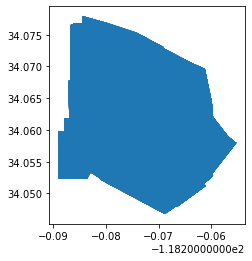

In [42]:
Westlake.plot()

In [49]:
Westlake.GEOID.is_unique

True

In [43]:
indicators = gpd.read_file('LAINC_2014.geojson')
indicators.shape

(155, 28)

In [50]:
indicators.zipcode.is_unique

True

In [47]:
join2 = gpd.sjoin(Westlake, indicators)
join2

,OBJECTID_left,name,geometry,GEOID,Typology,index_right,OBJECTID_right,zipcode,Rank,Neighborho,IRS_Ratio,HH_Size,Per_White,Per_Colleg,Rent,Index_Scor,IRS_Rati_1,IRS_Rati_2,HH_Incom_2,HH_Size_20,HH_Size_21,Percent_Wh,Percent__1,College_Pe,College__1,Gross_Rent,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037207710.00,Advanced Gentrification,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037210010.00,Advanced Gentrification,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037209300.00,Early/Ongoing Gentrification,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037209200.00,Early/Ongoing Gentrification,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037208000.00,Low-Income/Susceptible to Displacement,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037211122.00,Early/Ongoing Gentrification,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037192700.00,Early/Ongoing Gentrification,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037208302.00,At Risk of Gentrification,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037208402.00,Ongoing Displacement,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6037195710.00,Early/Ongoing Gentrification,13,14,90015,4,Downtown/Pico Union,-72.60,-16.89,5.96,13.48,46.15,0.65,5.09,1.39,28953,2.96,2.46,5.60,11.56,10.92,24.40,593,866,25478.61,13.64,15134,18226,20.40,Yes


In [45]:
join2.shape

(400, 33)

In [48]:
join2.GEOID.is_unique 

False

In [66]:
type(join2)

geopandas.geodataframe.GeoDataFrame

In [56]:
join2.duplicated()

106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False

In [58]:
join2.GEOID.duplicated(keep='first')

106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106    False
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True
106     True

In [72]:
join2.zipcode.unique()

array(['90015', '90006', '90005', '90010', '90057', '90020', '90004',
       '90017', '90012', '90026'], dtype=object)

In [64]:
index = join2.index_right

In [69]:
index = join2.index_right

In [71]:
index.unique()

array([13,  5,  4,  8, 46, 18,  3, 15, 10, 23])